In [1]:
id_ = 'core'
backup_dir = '/root/datos/maestria/netopaas/luca/data/atlas/'


# UTX (KDM6A) and KMT2D in Proto and Anti Oncogenicity

## Import

In [270]:
import pandas as pd
import numpy as np
import scipy as scp

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import anndata as ad
import scanpy as sc

from utils.functions import violin_genes_pval, rank_genes_group

In [3]:
adata = sc.read_h5ad(f'{backup_dir}/{id_}.h5ad')

In [4]:
adata.obs.groupby('tumor_stage').size()

/tmp/ipykernel_126866/226547110.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('tumor_stage').size()


tumor_stage
advanced      245051
early         379059
nan               43
non-cancer    268143
dtype: int64

### Import tumor cell prediciton

In [7]:
final_preds = pd.read_csv('/root/datos/maestria/netopaas/ikarus/core_core.csv')
final_preds

Unnamed: 0 final_pred
0       AAACCCAAGAGCCATG-1_0-1     Normal
1       AAACCCAAGATTAGAC-1_0-1      Tumor
2       AAACCCAAGGTCGCCT-1_0-1     Normal
3       AAACCCAAGTCATTGC-1_0-1     Normal
4       AAACCCACACGGATCC-1_0-1     Normal
...                        ...        ...
378355            bcBOGU_25-21     Normal
378356            bcHDOT_25-21      Tumor
378357            bcIFTF_25-21     Normal
378358            bcBDLT_25-21     Normal
378359            bcBNMZ_25-21     Normal

[378360 rows x 2 columns]

In [32]:
adata.obs['cell_id'] = adata.obs.index
final_preds = final_preds.rename(columns={'Unnamed: 0': 'cell_id'})

adata.obs =pd.merge(adata.obs, final_preds, on='cell_id', how='left')
adata.obs.final_pred = adata.obs.final_pred.fillna('Normal')

0         Normal
1         Normal
2         Normal
3         Normal
4         Normal
           ...  
892291    Normal
892292     Tumor
892293    Normal
892294    Normal
892295    Normal
Name: final_pred, Length: 892296, dtype: object

In [180]:
adata_normal = adata[(adata.obs.origin == 'normal_adjacent')]

In [36]:
adata_normal_tumor = adata[(adata.obs.origin == 'tumor_primary') & (adata.obs.final_pred == 'Normal')]
print(adata_normal_tumor.shape)

adata_normal_normal = adata[(adata.obs.origin == 'normal_adjacent') & (adata.obs.final_pred == 'Normal')]
print(adata_normal_normal.shape)

adata_tumor_tumor = adata[(adata.obs.origin == 'tumor_primary') & (adata.obs.final_pred == 'Tumor')]
print(adata_tumor_tumor.shape)

(312445, 17811)
(160313, 17811)
(65915, 17811)


Since there is only one cell in fibroblast for tumor we remove it to avoid erros

In [ ]:
adata_tumor_tumor = adata_tumor_tumor[adata_tumor_tumor.obs['Level_2_transfered_label'] != 'Fibroblast lineage']
adata_tumor_tumor.obs.groupby('Level_2_transfered_label').size()

## Marker genes

In [106]:
sc.tl.rank_genes_groups(adata_normal_tumor, 'Level_2_transfered_label', method='wilcoxon')
sc.tl.rank_genes_groups(adata_normal_normal, 'Level_2_transfered_label', method='wilcoxon')
sc.tl.rank_genes_groups(adata_tumor_tumor, 'Level_2_transfered_label', method='wilcoxon')

/usr/local/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/usr/local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


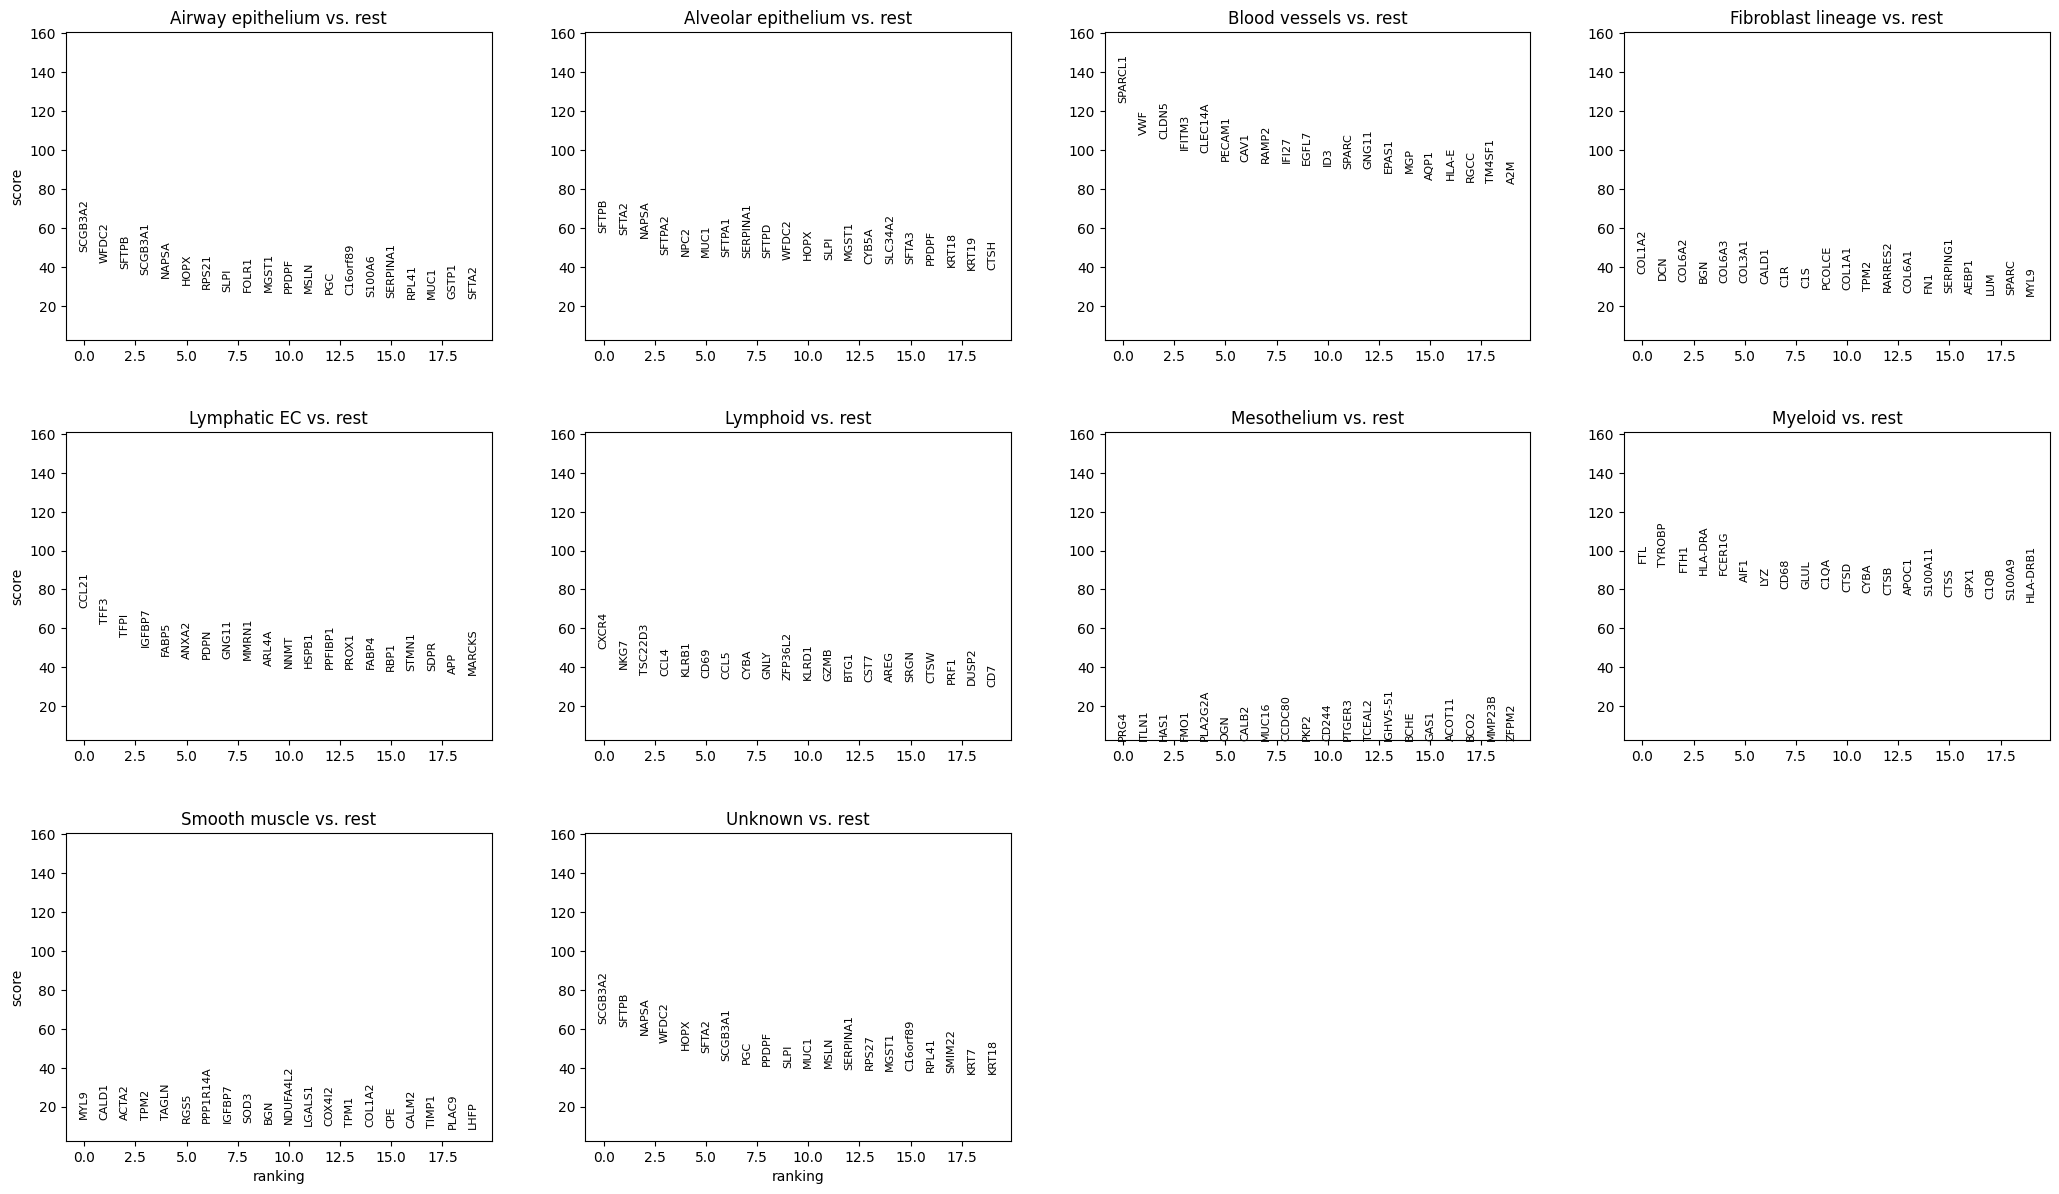

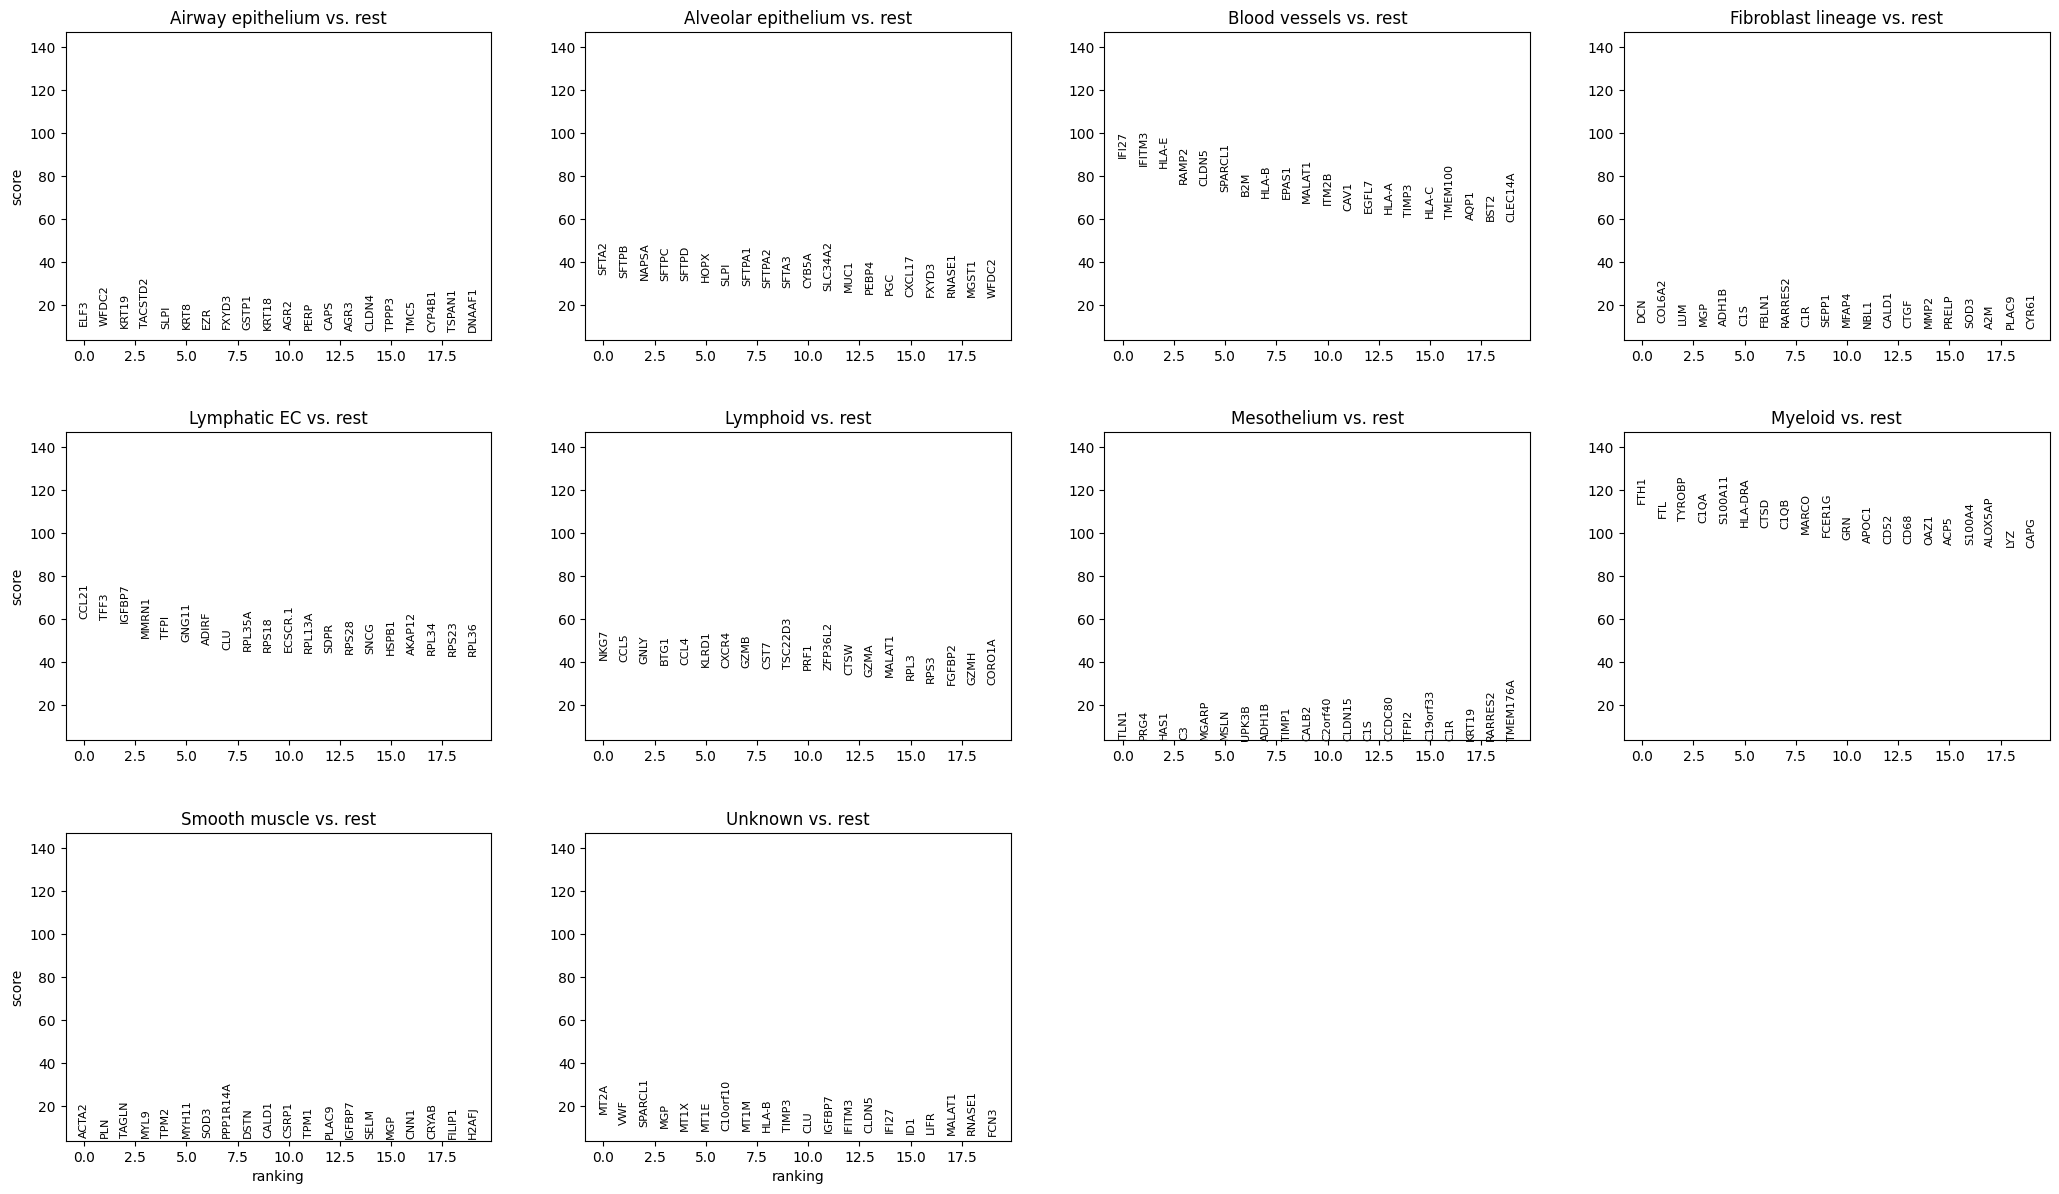

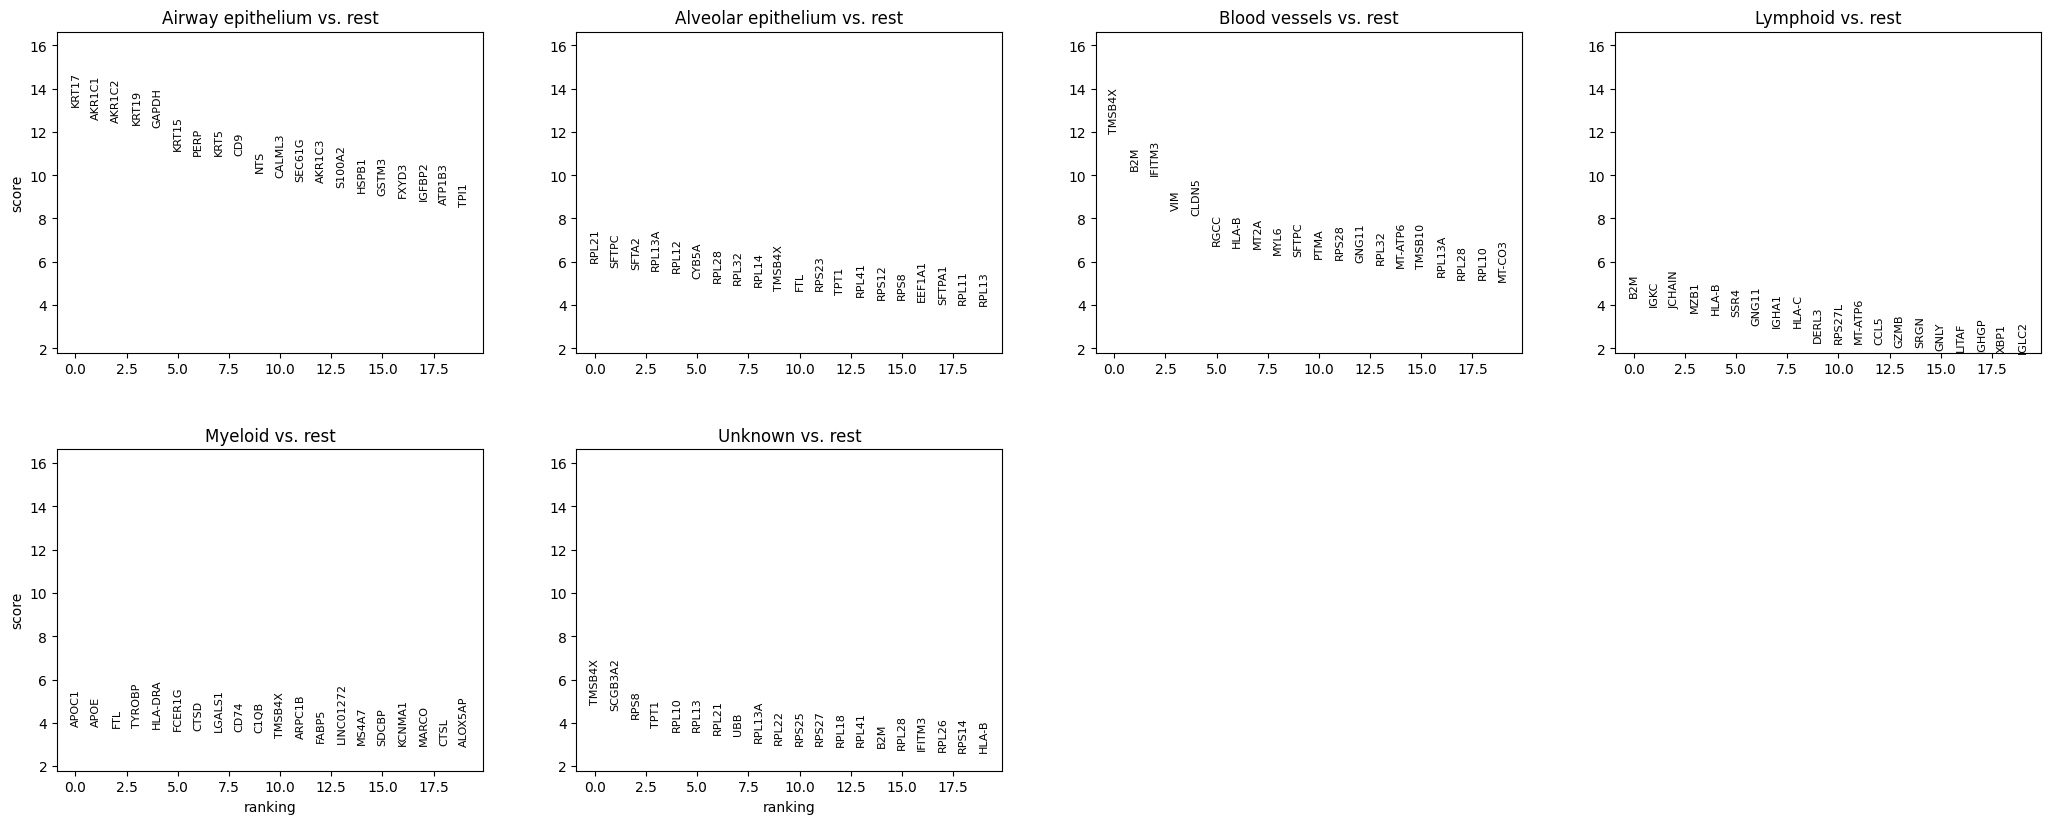

In [107]:
sc.pl.rank_genes_groups(adata_normal_tumor)
sc.pl.rank_genes_groups(adata_normal_normal)
sc.pl.rank_genes_groups(adata_tumor_tumor)

## Heatmaps

In [118]:
adata_normal_tumor.obs['Level_2_transfered_label'] = adata_normal_tumor.obs['Level_2_transfered_label'].fillna('Unknown')
adata_normal_normal.obs['Level_2_transfered_label'] = adata_normal_normal.obs['Level_2_transfered_label'].fillna('Unknown')
adata_tumor_tumor.obs['Level_2_transfered_label'] = adata_tumor_tumor.obs['Level_2_transfered_label'].fillna('Unknown')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:1067: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if isinstance(groupby, str) and is_categorical_dtype(adata.obs[groupby]):


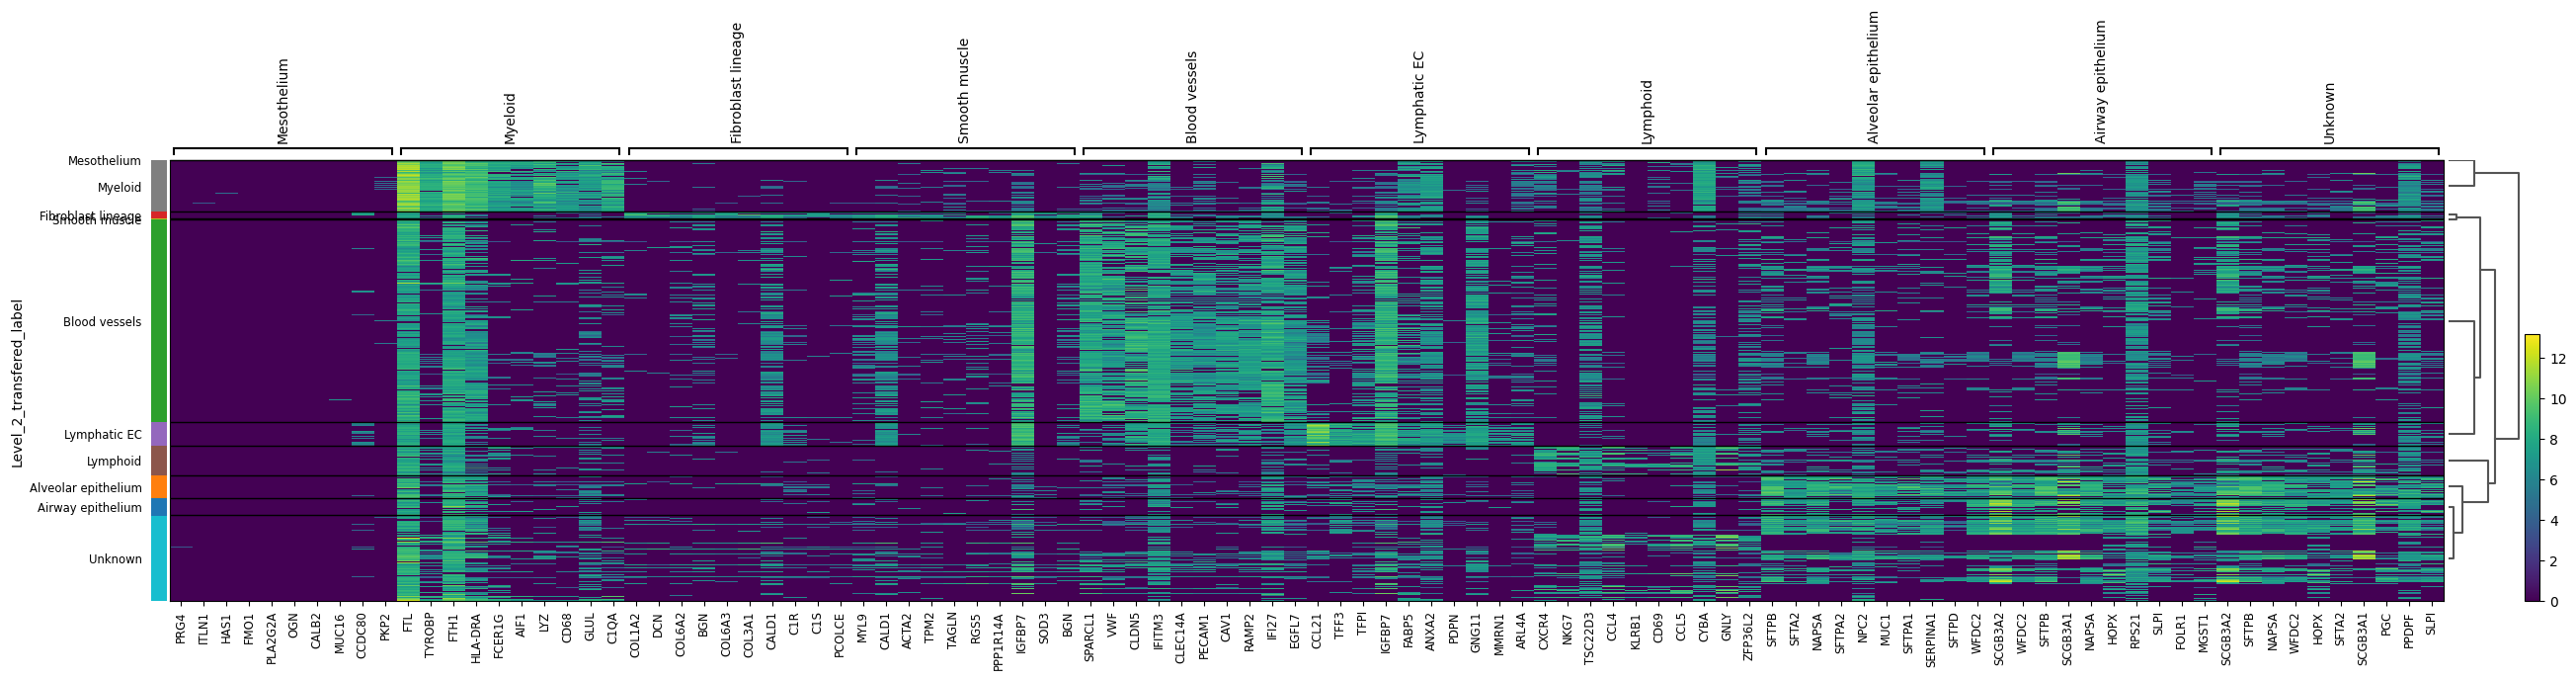

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:1067: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if isinstance(groupby, str) and is_categorical_dtype(adata.obs[groupby]):


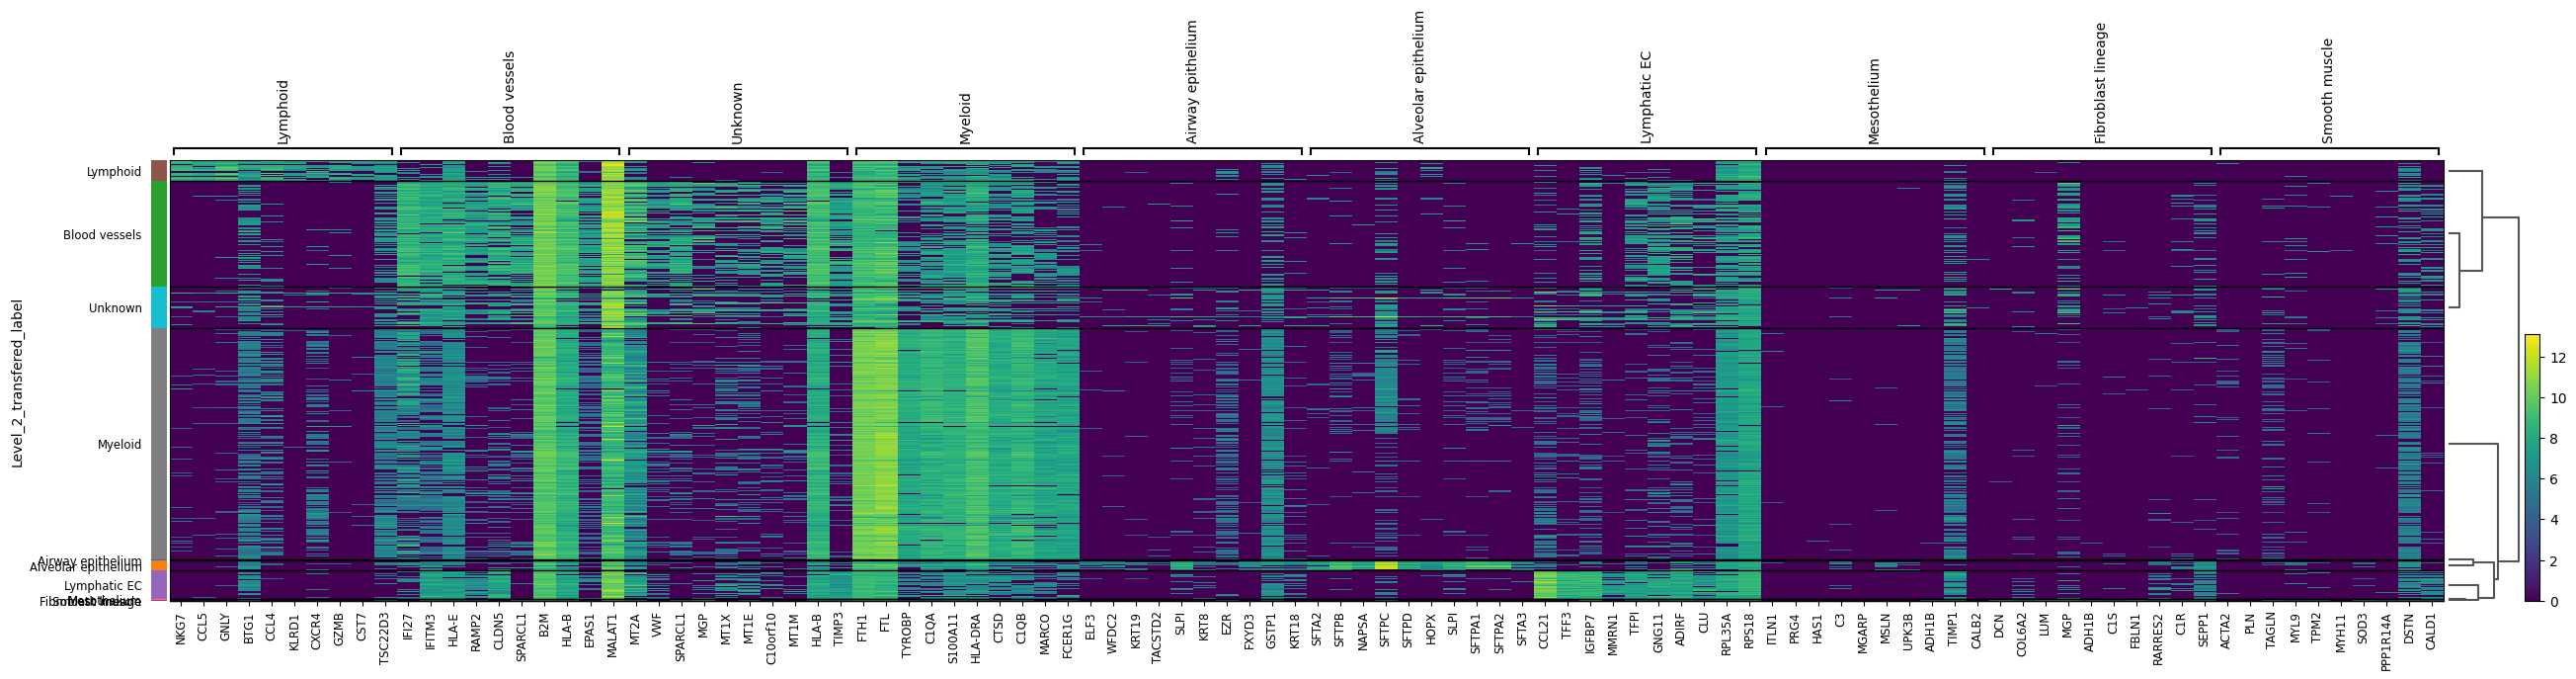

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:1067: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if isinstance(groupby, str) and is_categorical_dtype(adata.obs[groupby]):


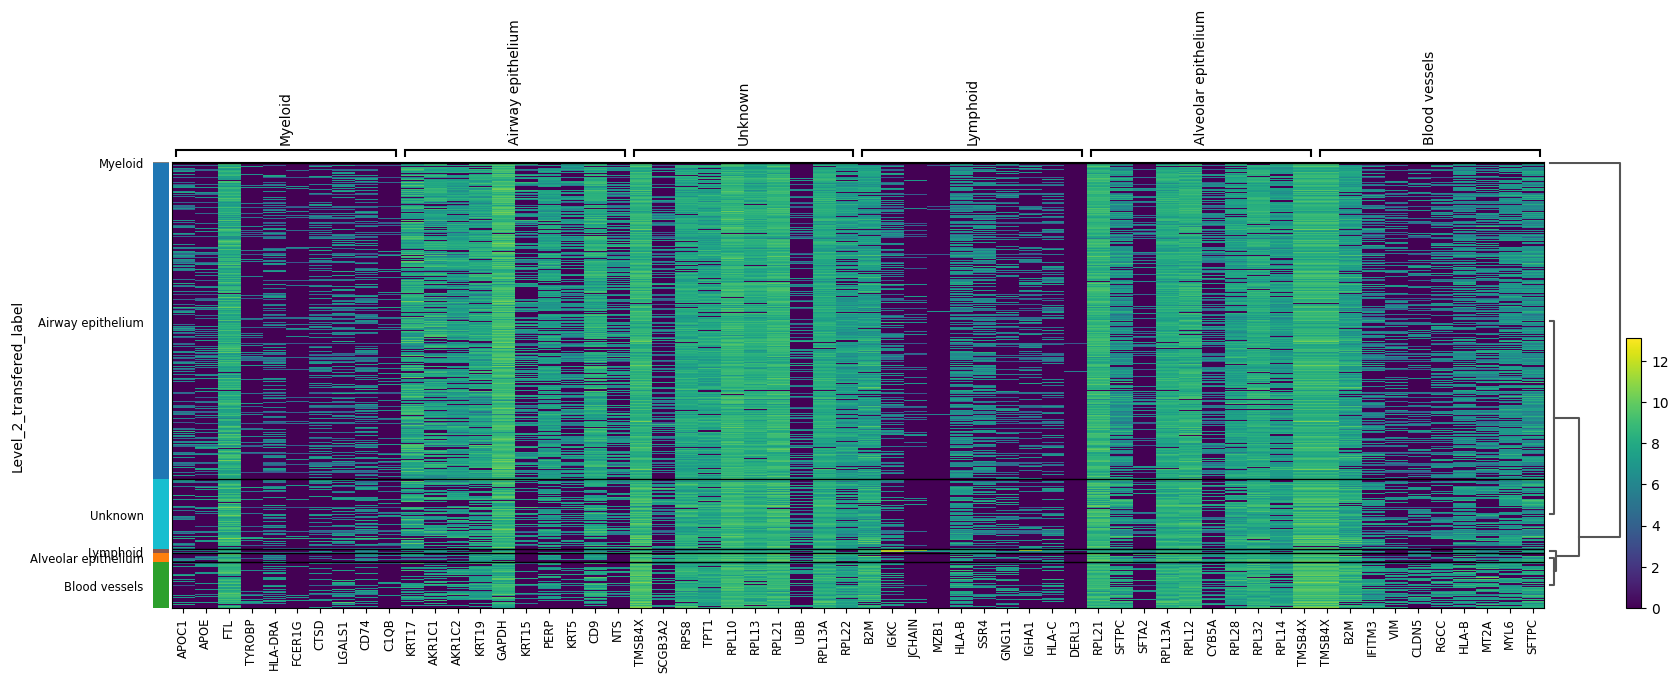

In [121]:
sc.pl.rank_genes_groups_heatmap(adata_normal_tumor, show_gene_labels=True)
sc.pl.rank_genes_groups_heatmap(adata_normal_normal, show_gene_labels=True)
sc.pl.rank_genes_groups_heatmap(adata_tumor_tumor, show_gene_labels=True)

## UMAP of UTX, samples and tumor classif

We do not need to calcualte umap beacuse it already cmoes in `adata`

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

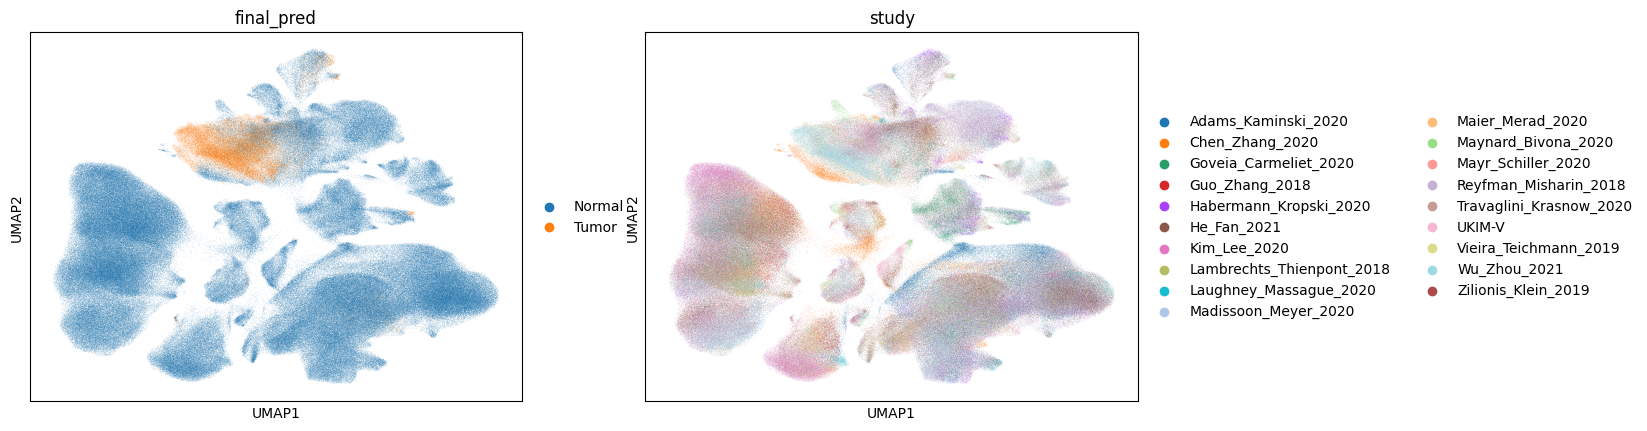

In [147]:
sc.pl.umap(adata, color=['final_pred','study'])

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


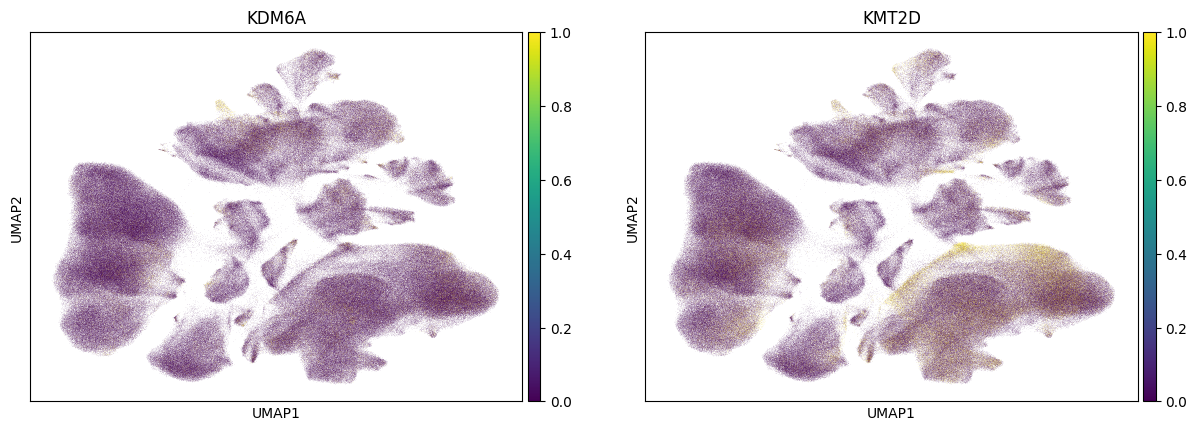

In [70]:
sc.pl.umap(adata, color=[ens_km, ens_kd], vmax = 1, title=['KDM6A', 'KMT2D'])

## Histograms and quantiles

### Define quantiles, subsets and gene sets

In [42]:
ens_kd = adata.var.index[adata.var.feature_name == 'KDM6A'][0]
ens_km = adata.var.index[adata.var.feature_name == 'KMT2D'][0]

In [44]:
adata_kd = adata[:,adata.var.index == ens_kd]
adata_km = adata[:,adata.var.index == ens_km]

In [45]:
points_kd = adata_kd.X.data
points_km = adata_km.X.data

quant_kd = np.quantile(points_kd, [0.33, 0.66])
quant_km = np.quantile(points_km, [0.33, 0.66])

In [73]:
mask_low = np.logical_and((adata_kd.X.toarray().ravel() < quant_kd[0]), adata_km.X.toarray().ravel() < quant_km[0])
mask_high = np.logical_and(adata_kd.X.toarray().ravel() > quant_kd[1], adata_km.X.toarray().ravel() > quant_kd[1])

In [107]:
adata.obs['utx_level'] = 'medium'
adata.obs.loc[mask_low, 'utx_level'] = 'low'
adata.obs.loc[mask_high, 'utx_level'] = 'high'
adata.obs['utx_level'] = adata.obs['utx_level'].astype('category')

In [196]:
dna_duplication_genes = ['MCM3', 'NRP1', 'RPA1', 'RFC1','LIG1' ]
apoptosis_genes = ['CASP3', 'CASP7', 'PARP1', 'TP53'] 
bcl_genes = ['BAX', 'BAK1', 'BID', 'BBC3', 'PMAIP1', 'BCL2', 'BCL2L1', 'MCL1']
pyroptosis_genes = ['NLRP1', 'NLRP3', 'NLRC4', 'AIM2', 'CASP1', 'GSDMD', 'PYCARD']
ferroptosis_genes = ['FANCD2', 'NCOA4', 'TFRC', 'PHKG2', 'HSBP1', 'ACO1', 'FTH1', 'STEAP3', 'NFS1', 'IREB2']

Check that the genes are in our dataset

In [204]:
print(len(adata.var.feature_name[adata.var.feature_name.isin(bcl_genes)]))
print(len(bcl_genes))

8
8


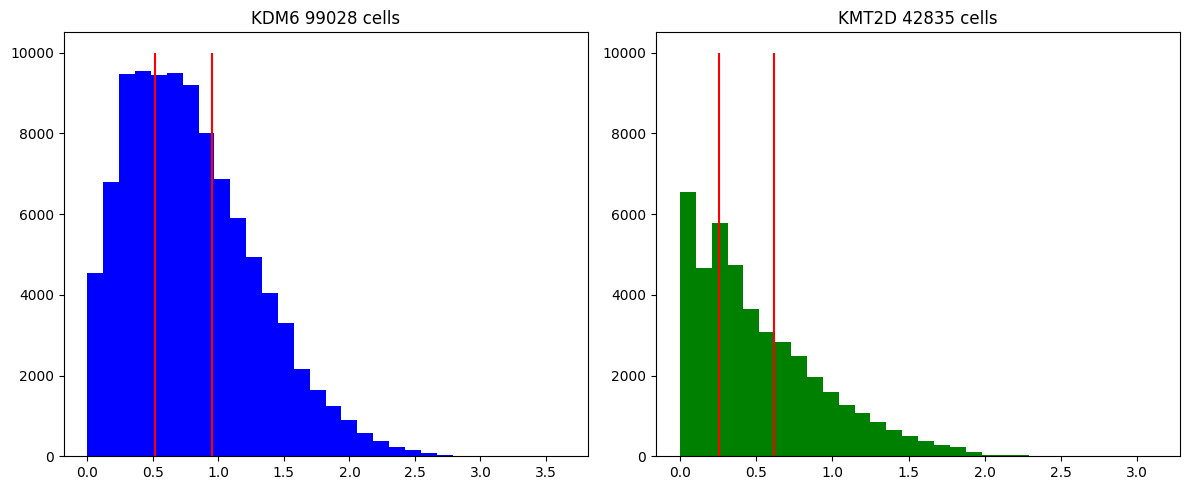

In [102]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

# First histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(points_kd, bins=30, color='blue')
plt.vlines(quant_kd, ymin=0, ymax=10000, colors='red')
plt.title(f'KDM6 {len(points_kd)} cells')
# Second histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(adata_km.X.data, bins=30, color='green')
plt.vlines(quant_km, ymin=0, ymax=10000, colors='red')
plt.title(f'KMT2D {len(points_km)} cells')

# Display the plots
plt.tight_layout()
plt.show()

Check if we have sequenced the genes

We got this as genes that are involved in the DNA duplication cycle
Get the quantiles and the views neccessary for plotting specfici conditions

In [82]:
compare_genes = ['MCM3', 'NRP1', 'RPA1', 'RFC1','LIG1' ]

levels_quant = ['blue', 'green', 'red']
adata_duplication = adata[:, adata.var.feature_name.isin(duplication_genes)]
tumor_diseases = ['lung adenocarcinoma', 'squamous cell lung carcinoma', 'non-small cell lung carcinoma']

# Add the final value to divide cells into 3 quantiles
quant_kd = np.quantile(points_kd, [0.33, 0.66, 1])
quant_km = np.quantile(points_km, [0.33, 0.66, 1])

In [124]:
adata_tumor = adata[adata.obs.disease.isin(tumor_diseases), :]
adata_normal = adata[adata.obs.disease.isin('normal'), :]

adata_kd_tumor = adata_tumor[:, adata_tumor.var.index == ens_genes[0]]
adata_kd_normal = adata_normal[:, adata_normla.var.index == ens_genes[0]]

adata_km_tumor = adata_tumor[:, adata_tumor.var.index == ens_genes[1]]
adata_km_normal = adata_normal[:, adata_normal.var.index == ens_genes[1]]

TypeError: only list-like objects are allowed to be passed to isin(), you passed a `str`

### Function for hist grid

In [115]:
from typing import List

def plot_hist_grid(adata: ad.AnnData, compare_genes: List[str], ens_genes: List[str],
                   adata_kd: ad.AnnData = None, adata_km: ad.AnnData = None,
                   adata_compare: ad.AnnData = None,
                   quant_km: List[float] = None, quant_kd: List[float] = None,
                   colors_quant: List[str]=['blue', 'green', 'red'],
                   legend_loc: str = 'upper right'):

    name_genes = [adata.var.feature_name[adata.var.index == ens][0] for ens in ens_genes]

    if not adata_compare:
        adata_compare = adata[:, adata.var.feature_name.isin(compare_genes)]
    if not adata_kd:
        adata_kd = adata[:,adata.var.index == ens_genes[0]]
    if not adata_km:
        adata_km = adata[:,adata.var.index == ens_km[1]]

    
    if not quant_kd:
        points_kd = adata_kd.X.data
        quant_kd = np.quantile(points_kd, [0.33, 0.66, 1])

    if not quant_km:
        points_km = adata_km.X.data
        quant_km = np.quantile(points_km, [0.33, 0.66, 1])        
    
    color_labels = ['Low', 'Middle', 'High']  # Adjust these labels as necessary
    levels_quant = ['blue', 'green', 'red']
    colors = levels_quant

    # Create a list of patch handles for these colors
    handles = [mpatches.Patch(color=color, label=label) for label, color in zip(color_labels, colors)]

    n_genes = len(compare_genes)
    plt.figure(figsize=(3*(n_genes+1), 15))

    for i, quant in enumerate(quant_kd):
        quant_ = 0 if i == 0 else quant_kd[i-1]
        # We use multiply because sparse matrices
        condition_kd = (adata_kd.X < quant).multiply(adata_kd.X > quant_)
        condition_km = (adata_km.X < quant).multiply(adata_km.X > quant_)
        adata_quant = adata_compare[condition_kd.multiply(condition_km), : ]
    
        for j, gene in enumerate(compare_genes):
            print(gene)
            adata_gene = adata_quant[:, adata_quant.var.feature_name == gene]
            plt.subplot(3, n_genes, i*len(compare_genes) + j+1) # 3 rows, n columns ith plot
            plt.hist(adata_gene.X.data, bins=20, color=levels_quant[i])
            plt.title(gene)
    
    # Add an overall title
    title: str = f'Hists for genes in different {name_genes[0]} & {name_genes[1]} expression levels',
    plt.suptitle(title)
    
    # Create a single legend for the figure
    plt.figlegend(handles=handles, loc=legend_loc, ncol=len(color_labels))
    plt.show()

### KMT2D & KDM6A

#### Normal & Tumor

/usr/local/lib/python3.11/site-packages/scipy/sparse/_compressed.py:290: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


MCM3
NRP1
RPA1
RFC1
LIG1
MCM3
NRP1
RPA1
RFC1
LIG1
MCM3
NRP1
RPA1
RFC1
LIG1


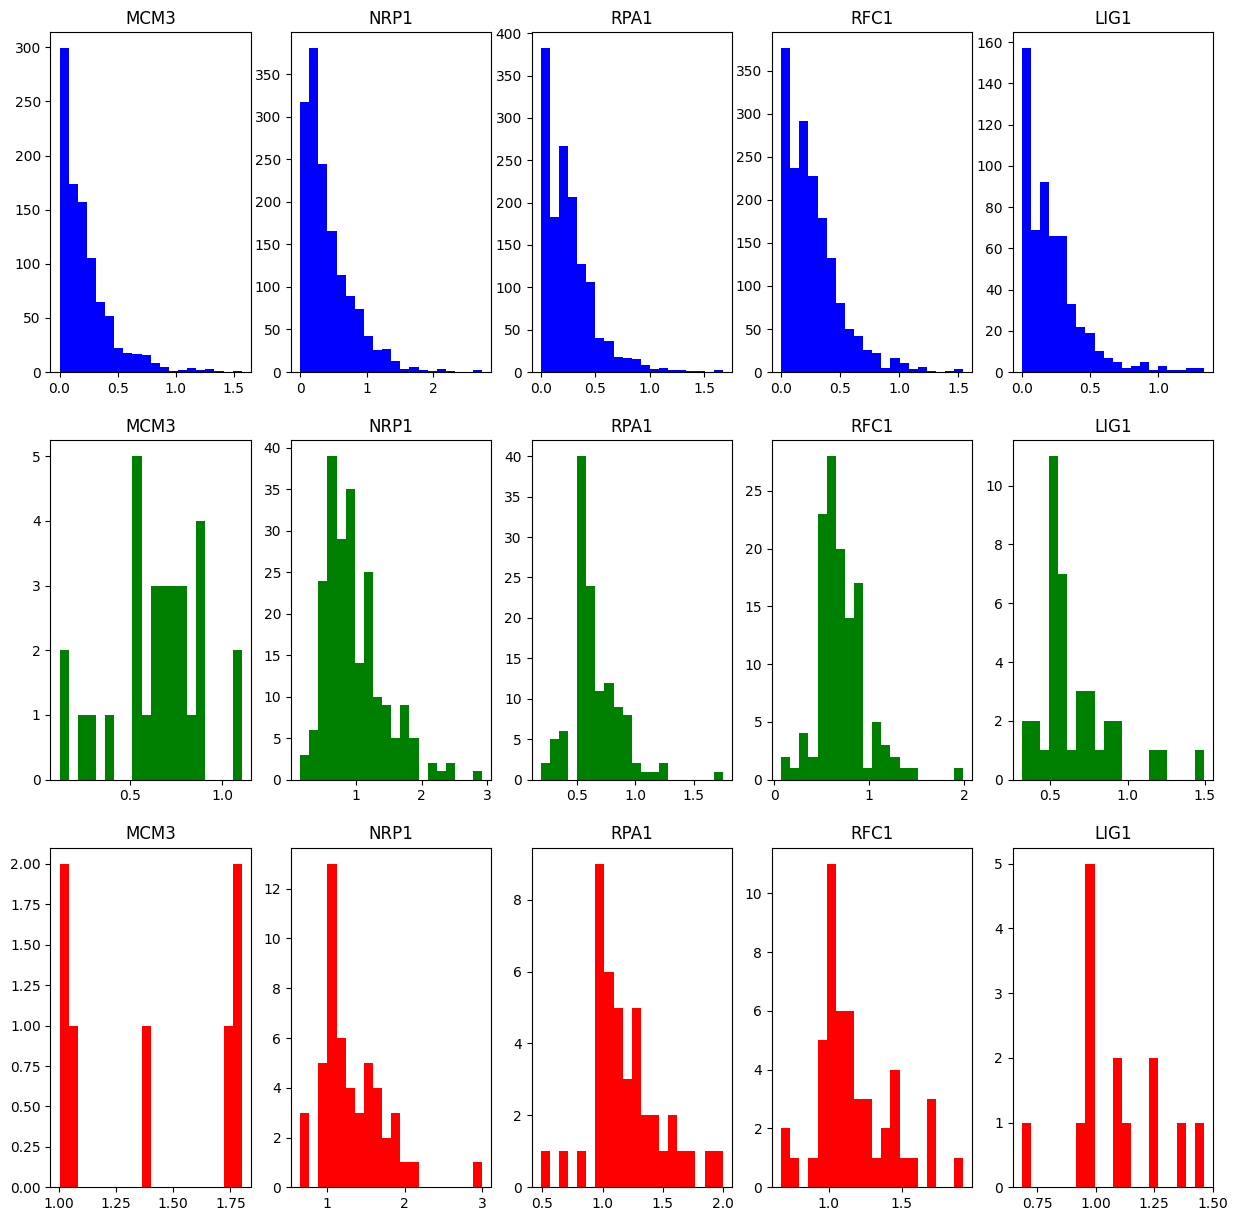

In [170]:
plt.figure(figsize=(15, 15))

for i, quant in enumerate(quant_kd):
    quant_ = 0 if i == 0 else quant_kd[i-1]
    # We use multiply because sparse matrices
    condition_kd = (adata_kd.X < quant).multiply(adata_kd.X > quant_)
    condition_km = (adata_km.X < quant).multiply(adata_km.X > quant_)
    adata_quant = adata_duplication[condition_kd.multiply(condition_km), : ]

    for j, gene in enumerate(duplication_genes):
        print(gene)
        adata_gene = adata_quant[:, adata_quant.var.feature_name == gene]
        plt.subplot(3, 5, i*len(duplication_genes) + j+1) # 3 rows, 5 columns ith plot
        plt.hist(adata_gene.X.data, bins=20, color=levels_quant[i])
        plt.title(gene)

plt.show()

#### Tumor

/tmp/ipykernel_72651/114102669.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name_genes = [adata.var.feature_name[adata.var.index == ens][0] for ens in ens_genes]
/usr/local/lib/python3.11/site-packages/scipy/sparse/_compressed.py:290: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


CASP3
CASP7
PARP1
BAX
CASP3
CASP7
PARP1
BAX
CASP3
CASP7
PARP1
BAX


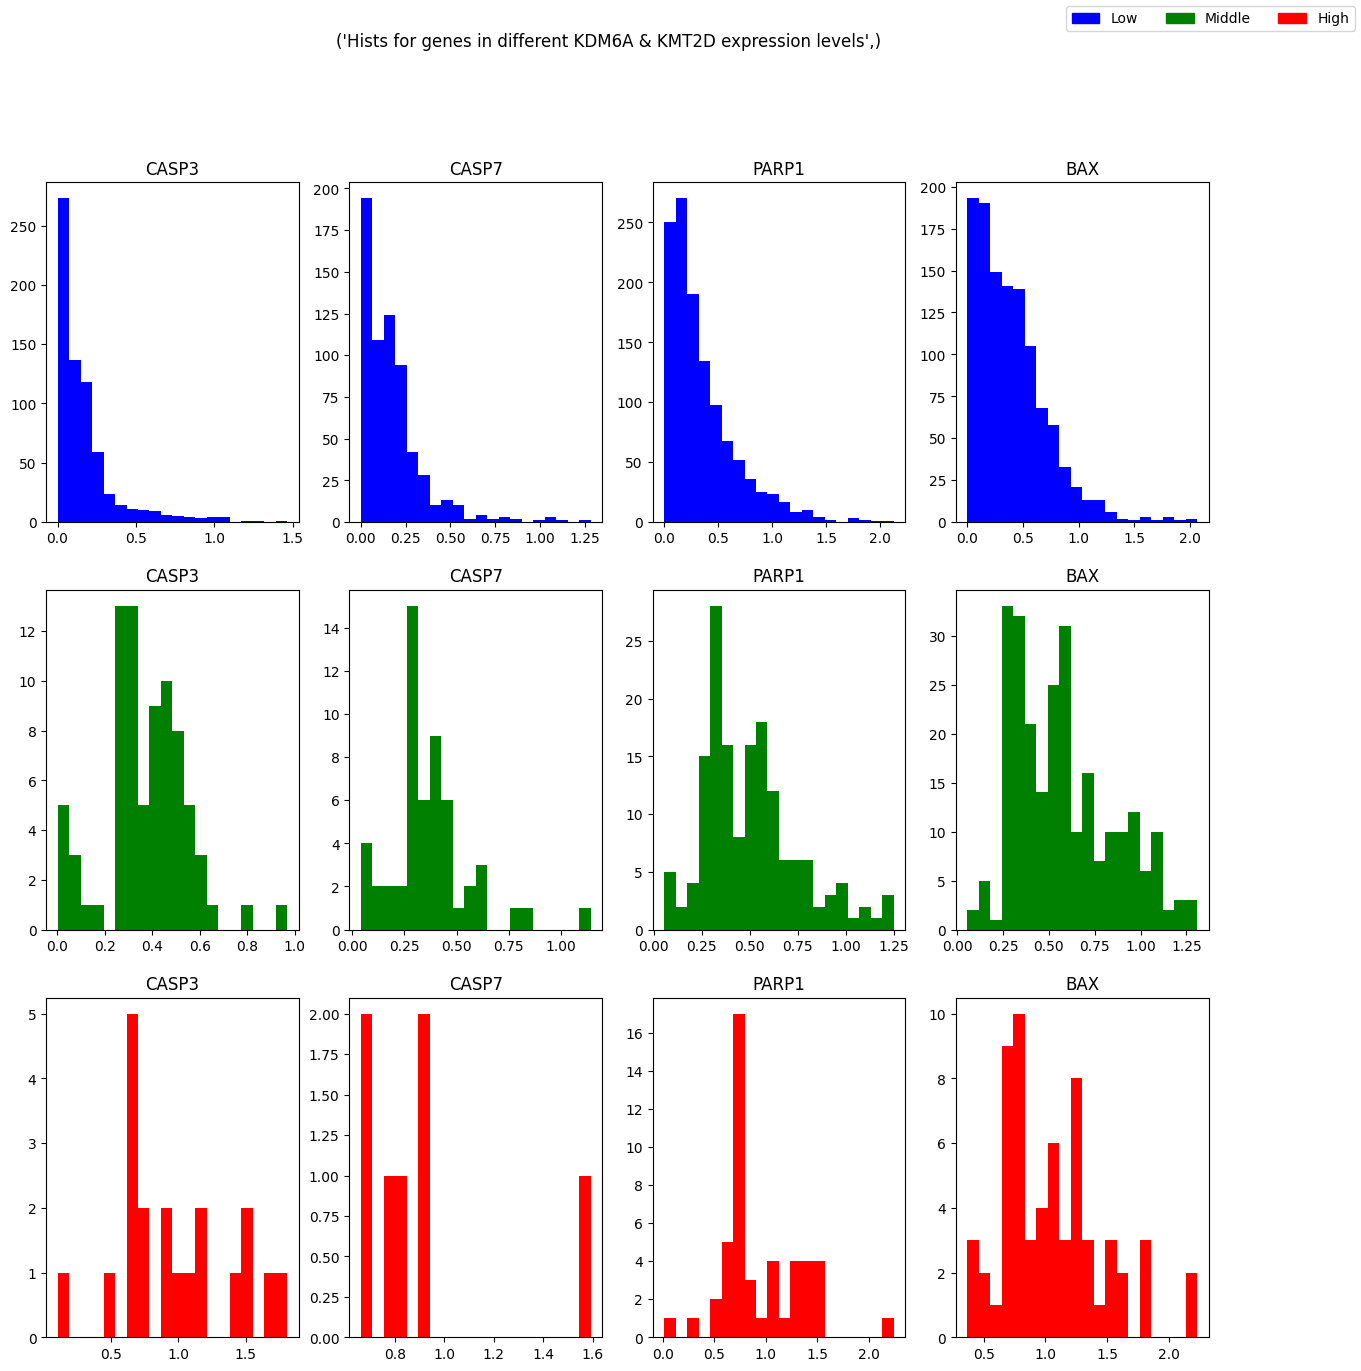

In [105]:
plot_hist_grid(adata_tumor, ['CASP3', 'CASP7', 'PARP1', 'BAX'],
               [ens_kd, ens_km], adata_kd_tumor, adata_km_tumor)

/tmp/ipykernel_72651/114102669.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name_genes = [adata.var.feature_name[adata.var.index == ens][0] for ens in ens_genes]
/usr/local/lib/python3.11/site-packages/scipy/sparse/_compressed.py:290: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


BAK1
BID
BBC3
PMAIP1
BAK1
BID
BBC3
PMAIP1
BAK1
BID
BBC3
PMAIP1


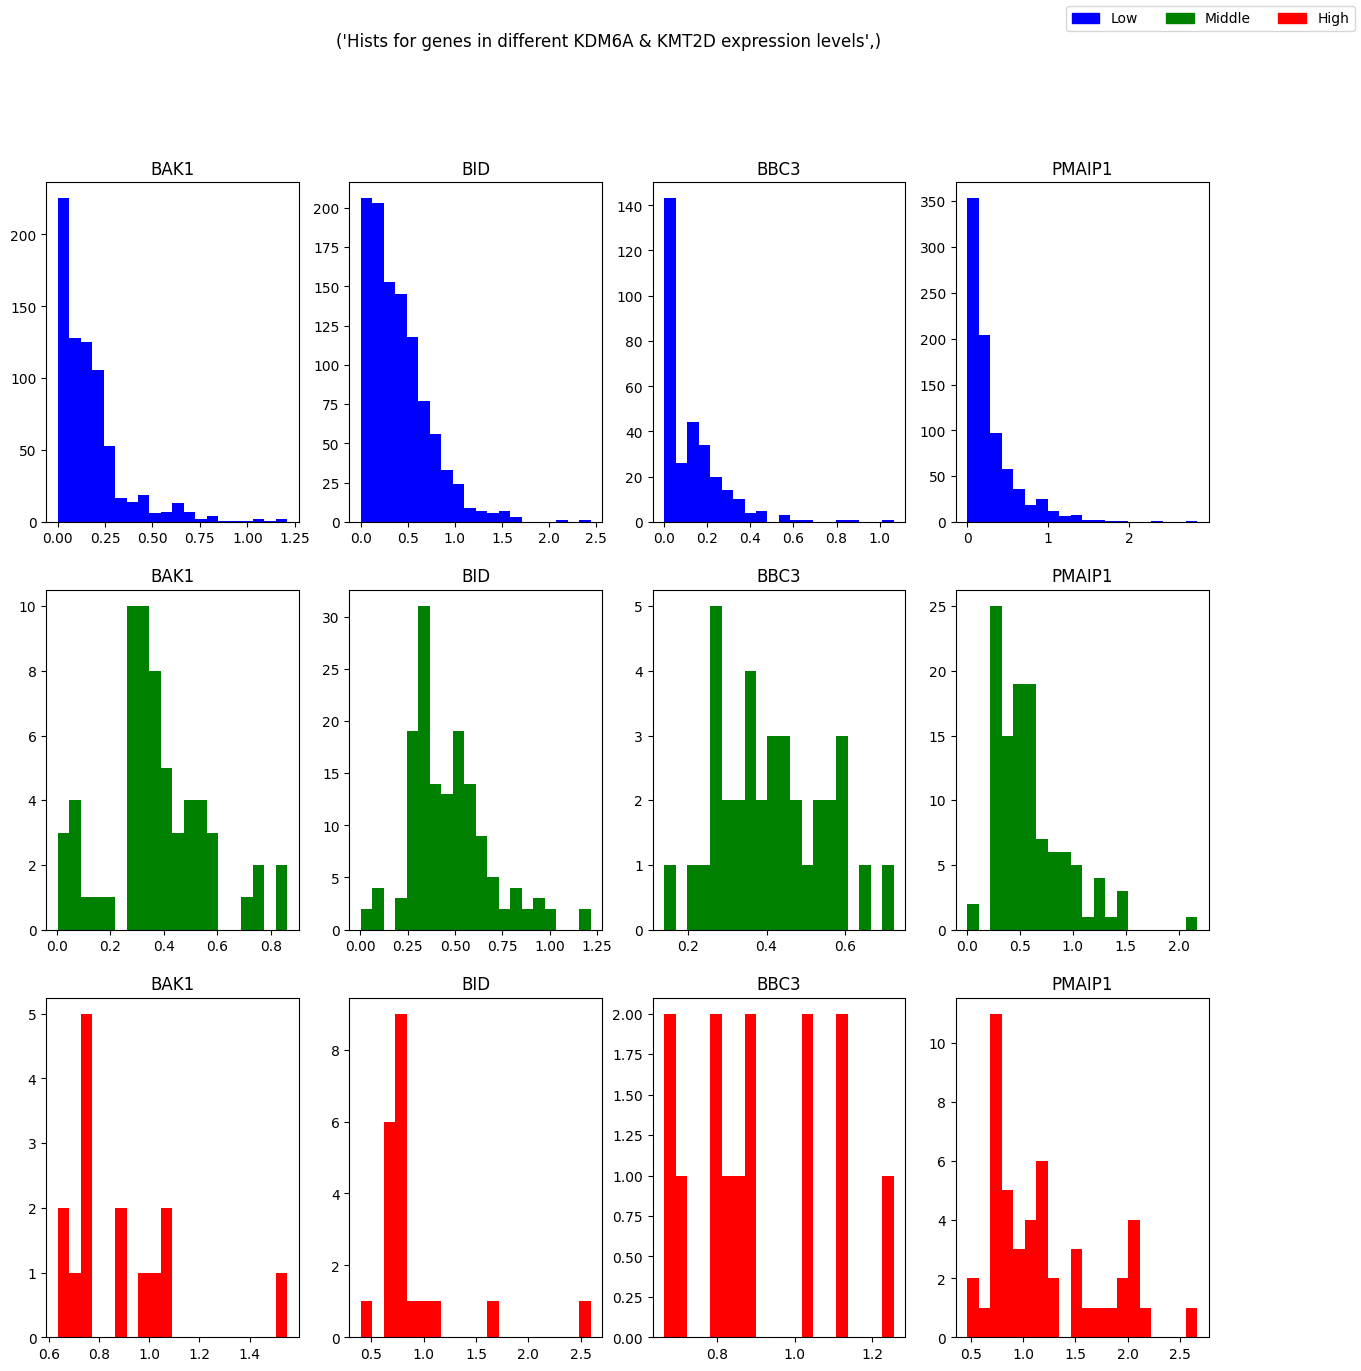

In [121]:
plot_hist_grid(adata_tumor, ['BAK1', 'BID', 'BBC3', 'PMAIP1'],
               [ens_kd, ens_km], adata_kd_tumor, adata_km_tumor)

/tmp/ipykernel_72651/114102669.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name_genes = [adata.var.feature_name[adata.var.index == ens][0] for ens in ens_genes]
/usr/local/lib/python3.11/site-packages/scipy/sparse/_compressed.py:290: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


BCL2
BCL2L1
MCL1
TP53
BCL2
BCL2L1
MCL1
TP53
BCL2
BCL2L1
MCL1
TP53


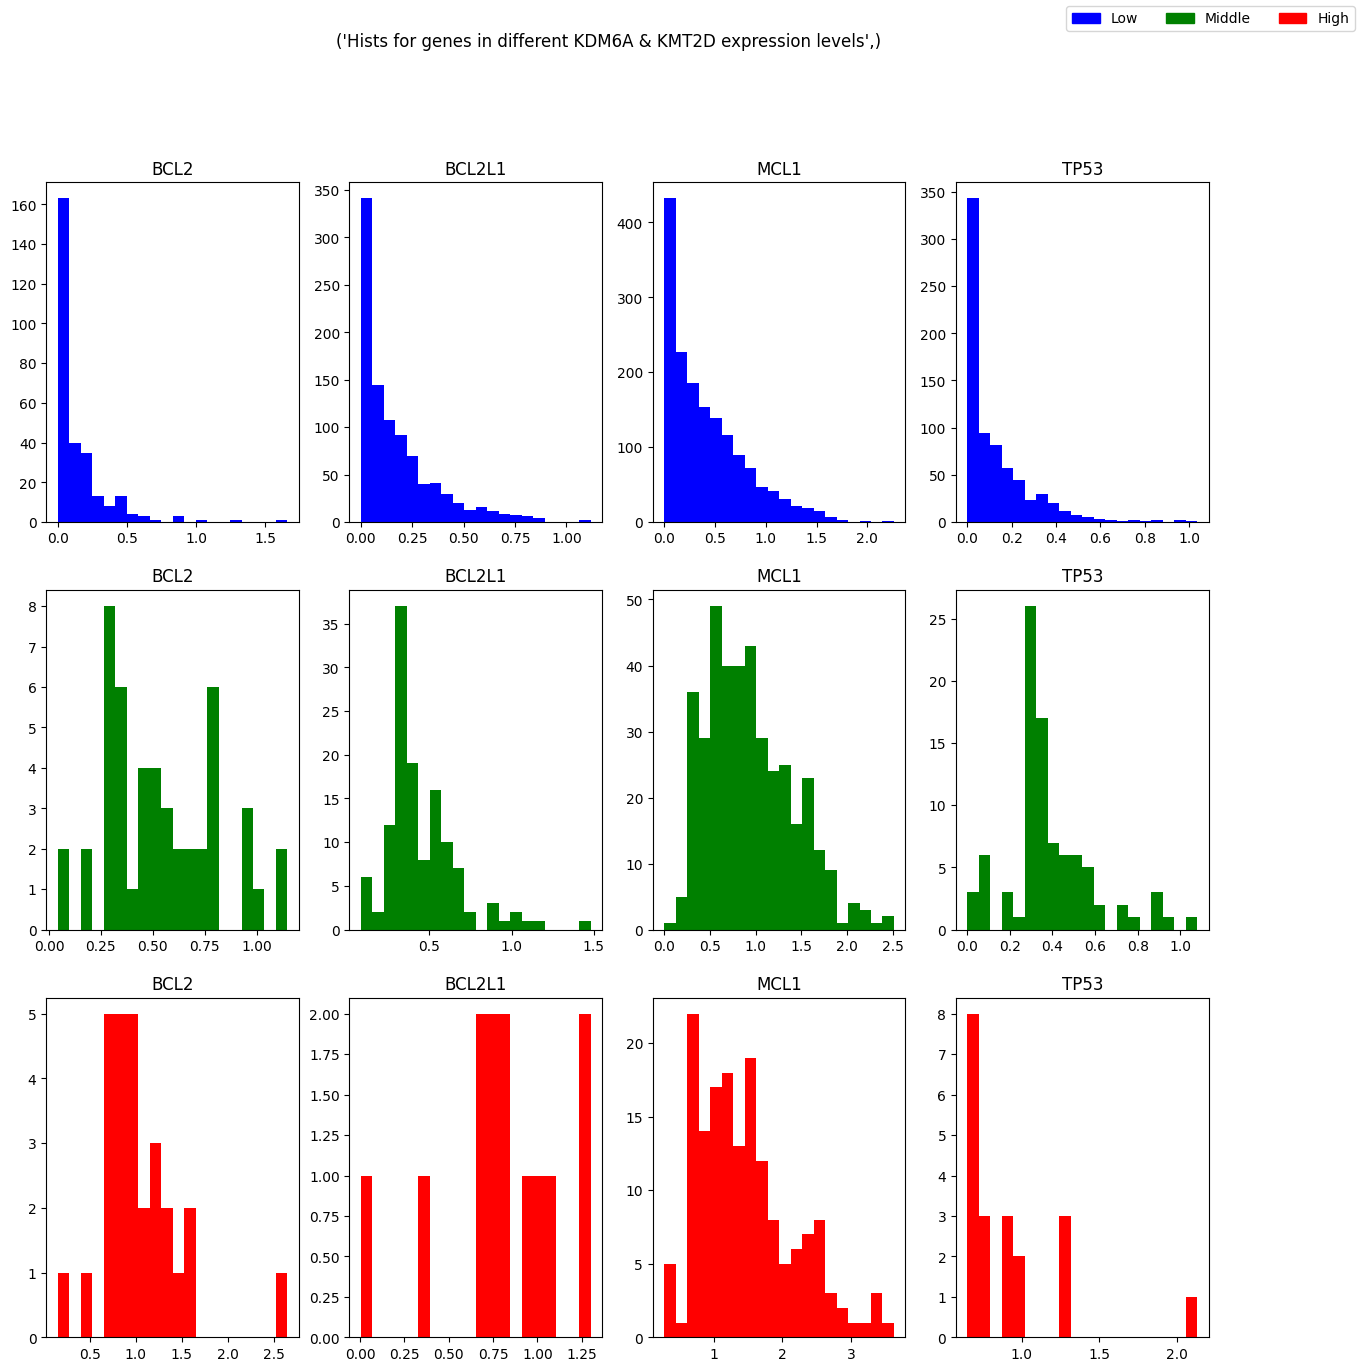

In [120]:
plot_hist_grid(adata_tumor, ['BCL2', 'BCL2L1', 'MCL1', 'TP53'],
               [ens_kd, ens_km], adata_kd_tumor, adata_km_tumor)

#### Normal

/tmp/ipykernel_72651/114102669.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name_genes = [adata.var.feature_name[adata.var.index == ens][0] for ens in ens_genes]
/usr/local/lib/python3.11/site-packages/scipy/sparse/_compressed.py:290: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


CASP3
CASP7
PARP1
BAX
CASP3
CASP7
PARP1
BAX
CASP3
CASP7
PARP1
BAX


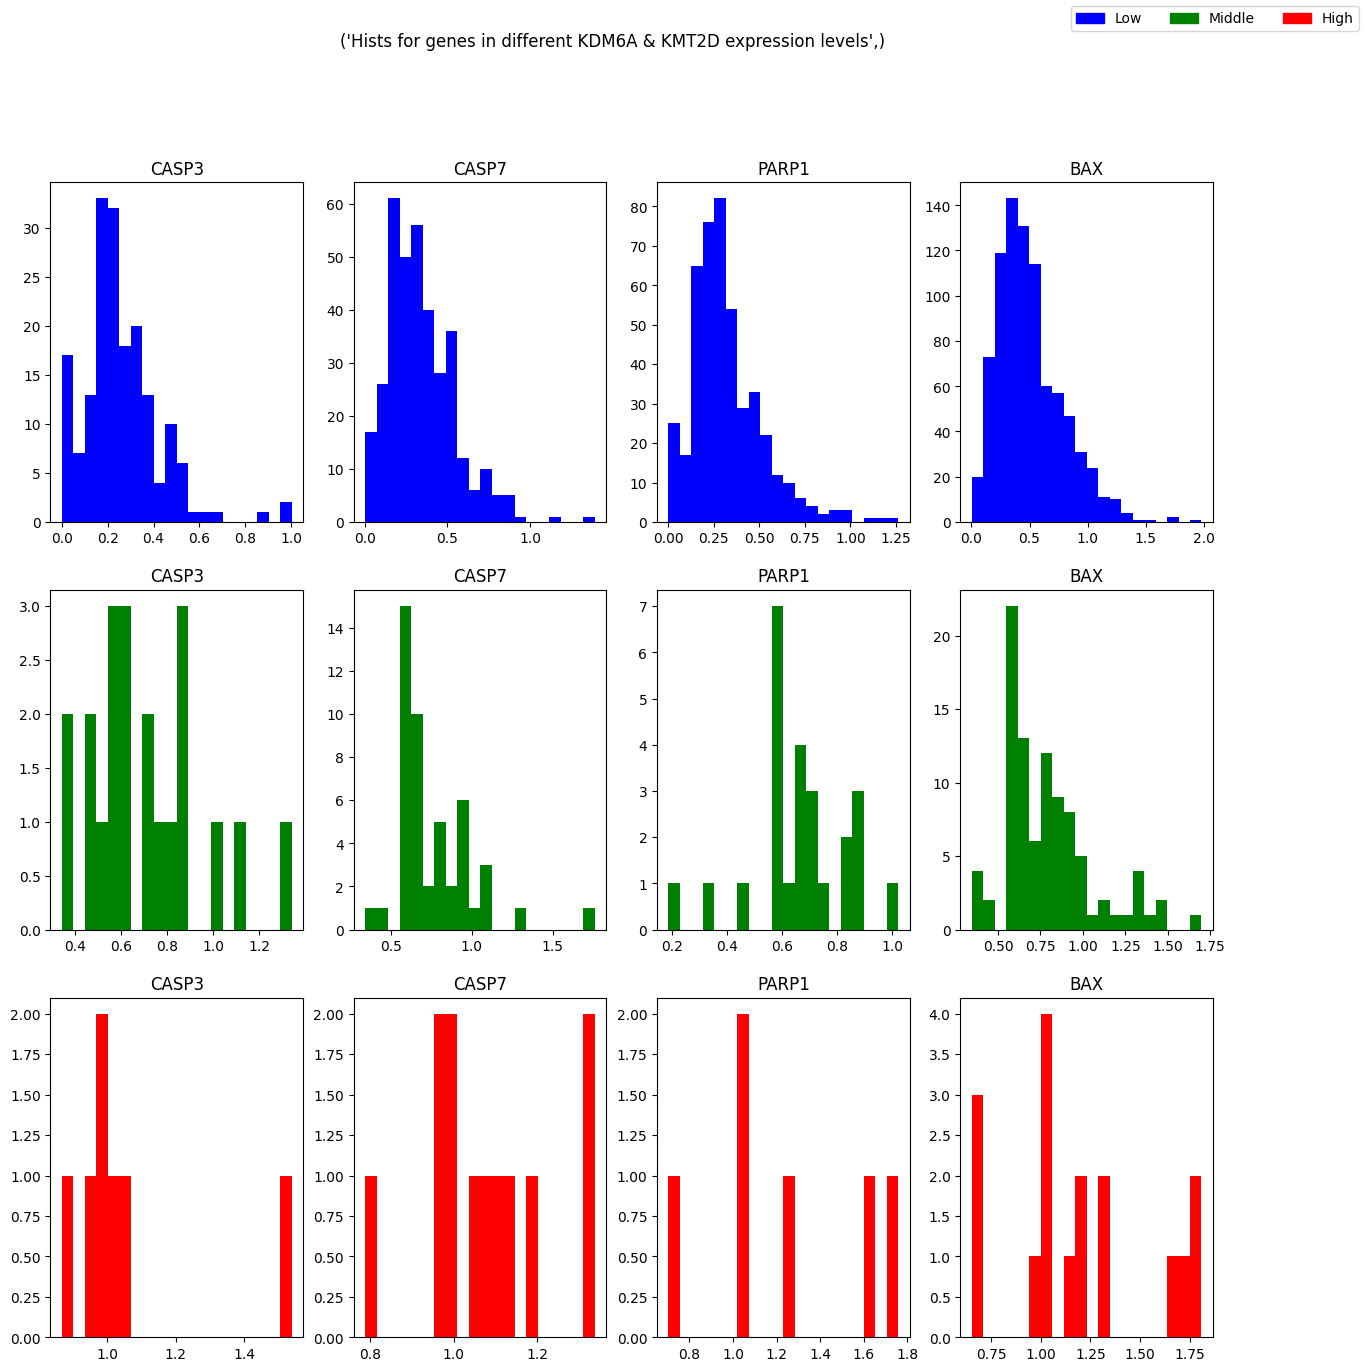

In [116]:
plot_hist_grid(adata_normal, ['CASP3', 'CASP7', 'PARP1', 'BAX'],
               [ens_kd, ens_km], adata_kd_normal, adata_km_normal)

/tmp/ipykernel_72651/114102669.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name_genes = [adata.var.feature_name[adata.var.index == ens][0] for ens in ens_genes]
/usr/local/lib/python3.11/site-packages/scipy/sparse/_compressed.py:290: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


BAK1
BID
BBC3
PMAIP1
BAK1
BID
BBC3
PMAIP1
BAK1
BID
BBC3
PMAIP1


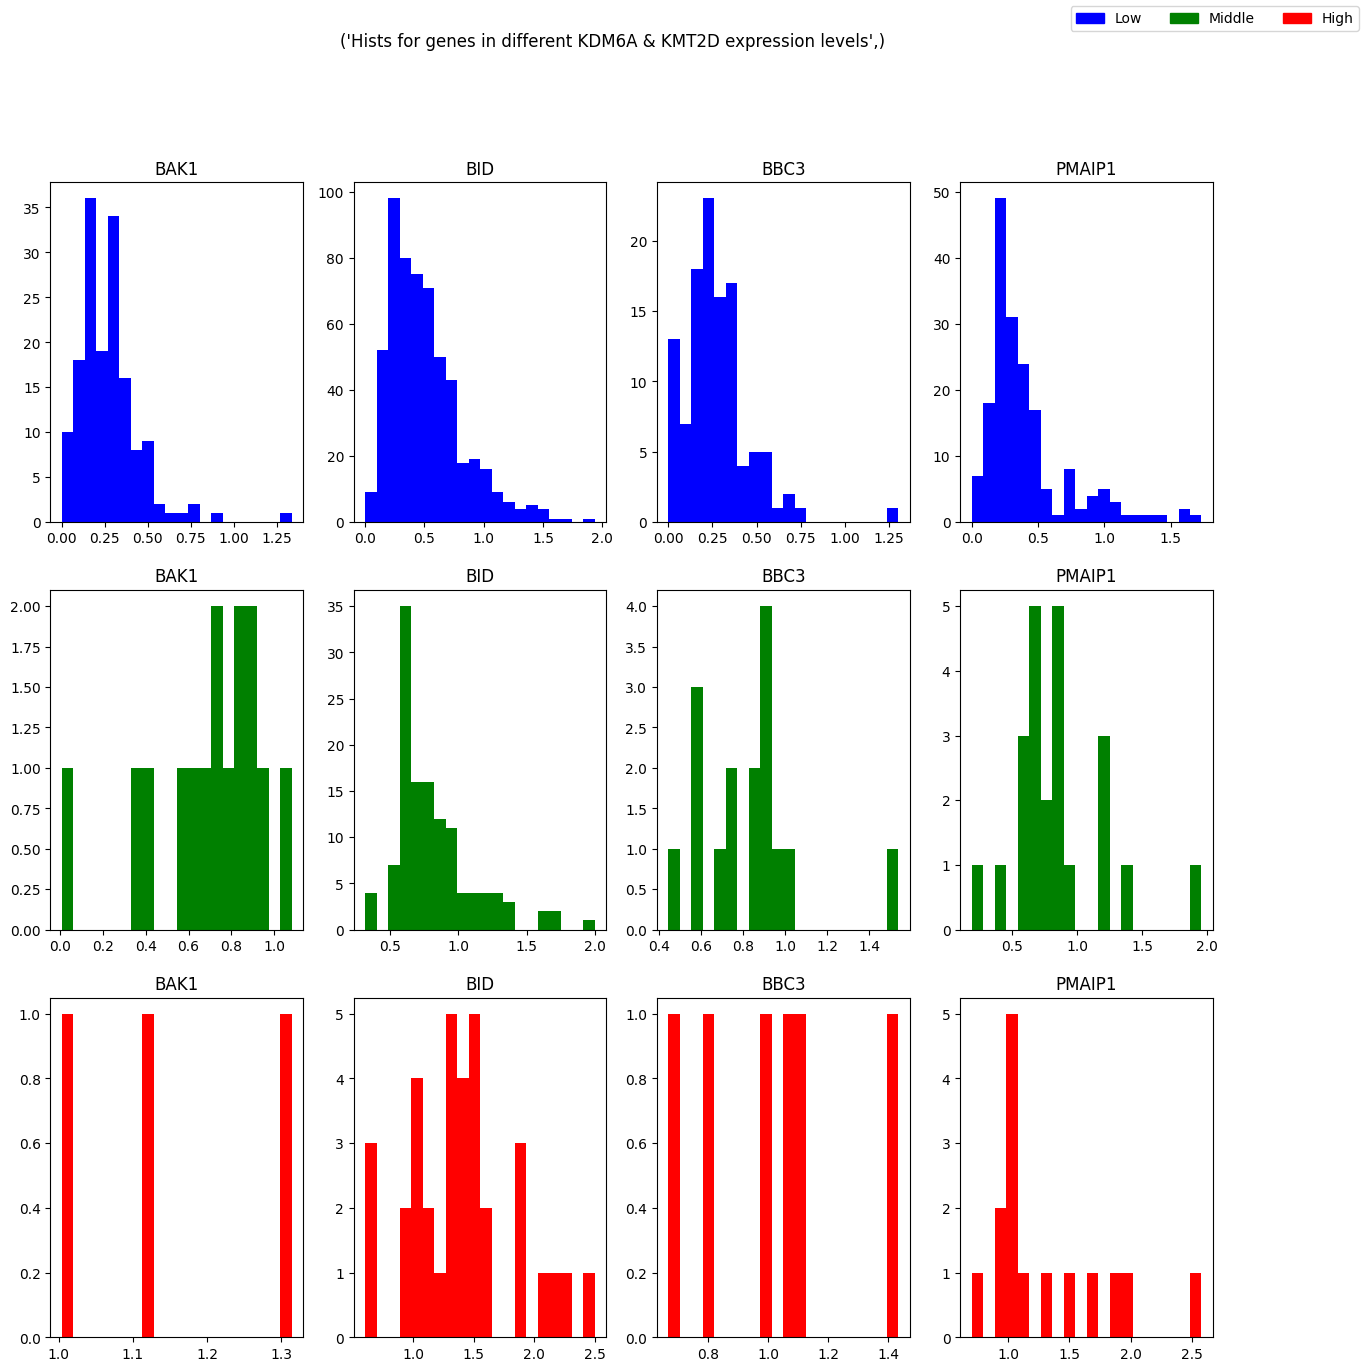

In [123]:
plot_hist_grid(adata_normal, ['BAK1', 'BID', 'BBC3', 'PMAIP1'],
               [ens_kd, ens_km], adata_kd_normal, adata_km_normal)

/tmp/ipykernel_72651/114102669.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name_genes = [adata.var.feature_name[adata.var.index == ens][0] for ens in ens_genes]
/usr/local/lib/python3.11/site-packages/scipy/sparse/_compressed.py:290: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


BCL2
BCL2L1
MCL1
TP53
BCL2
BCL2L1
MCL1
TP53
BCL2
BCL2L1
MCL1
TP53


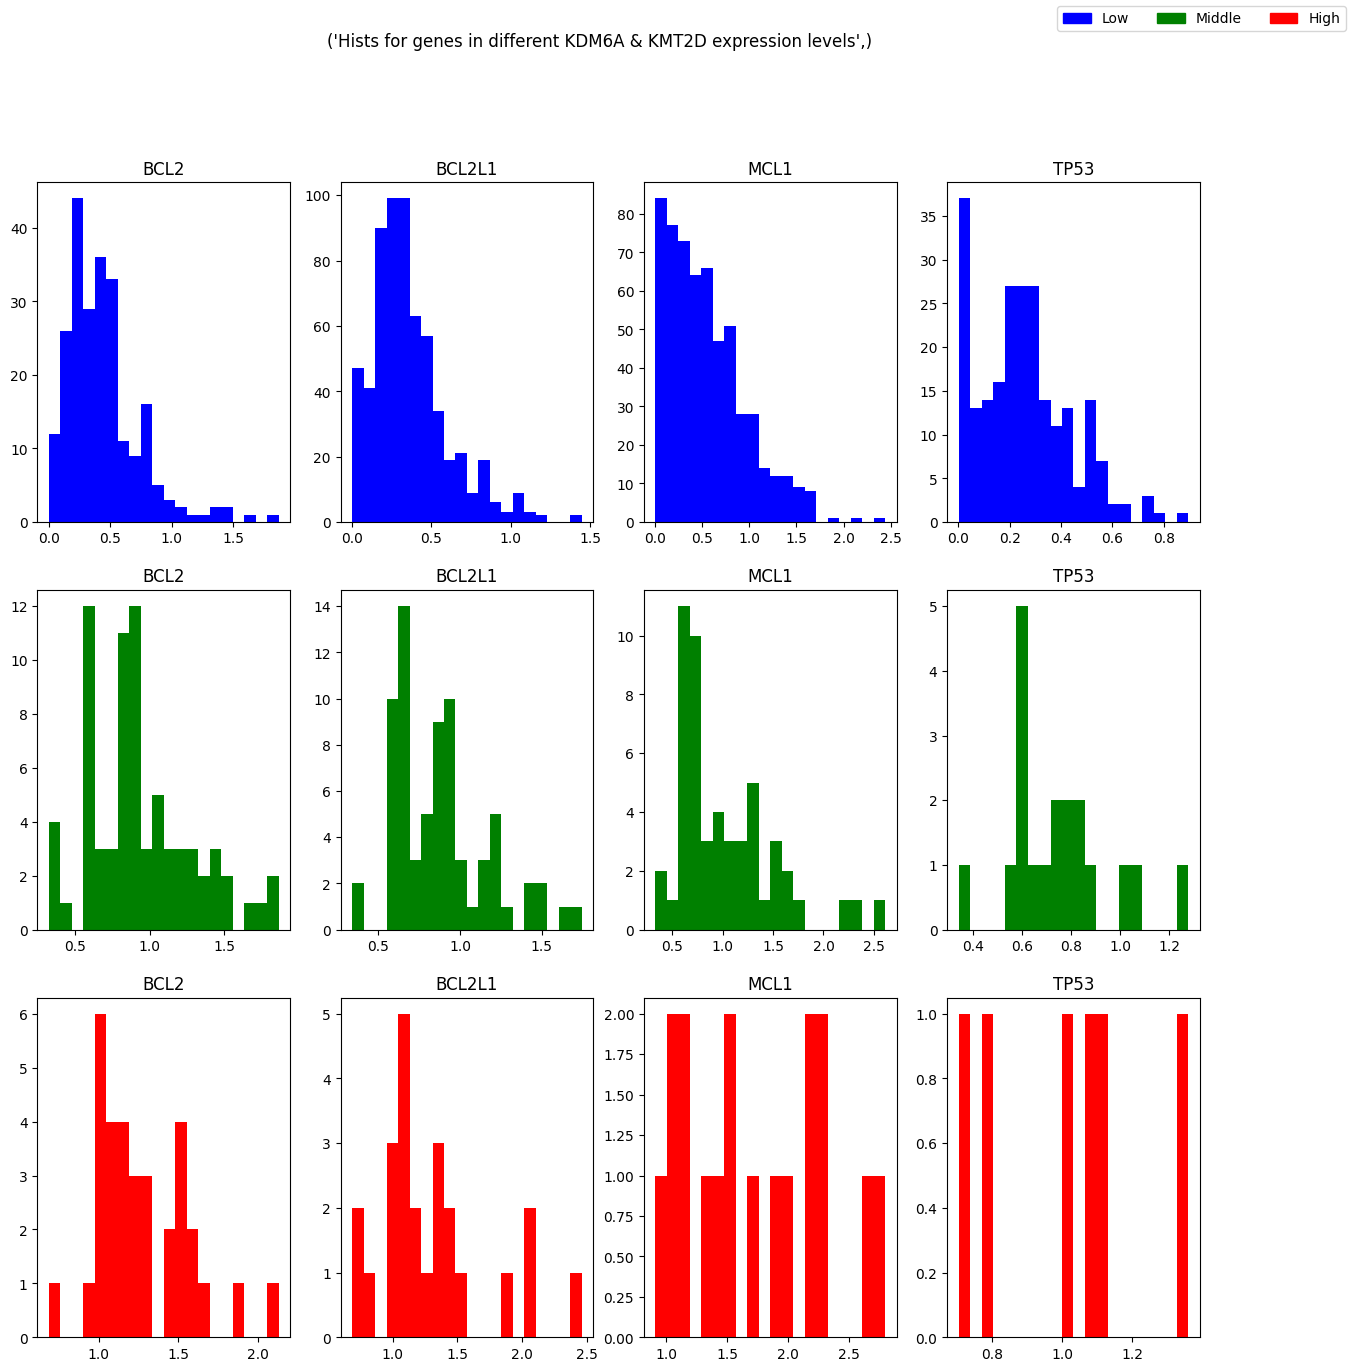

In [122]:
plot_hist_grid(adata_normal, ['BCL2', 'BCL2L1', 'MCL1', 'TP53'],
               [ens_kd, ens_km], adata_kd_normal, adata_km_normal)

### KMT2D

MCM3
NRP1
RPA1
RFC1
LIG1
MCM3
NRP1
RPA1
RFC1
LIG1
MCM3
NRP1
RPA1
RFC1
LIG1


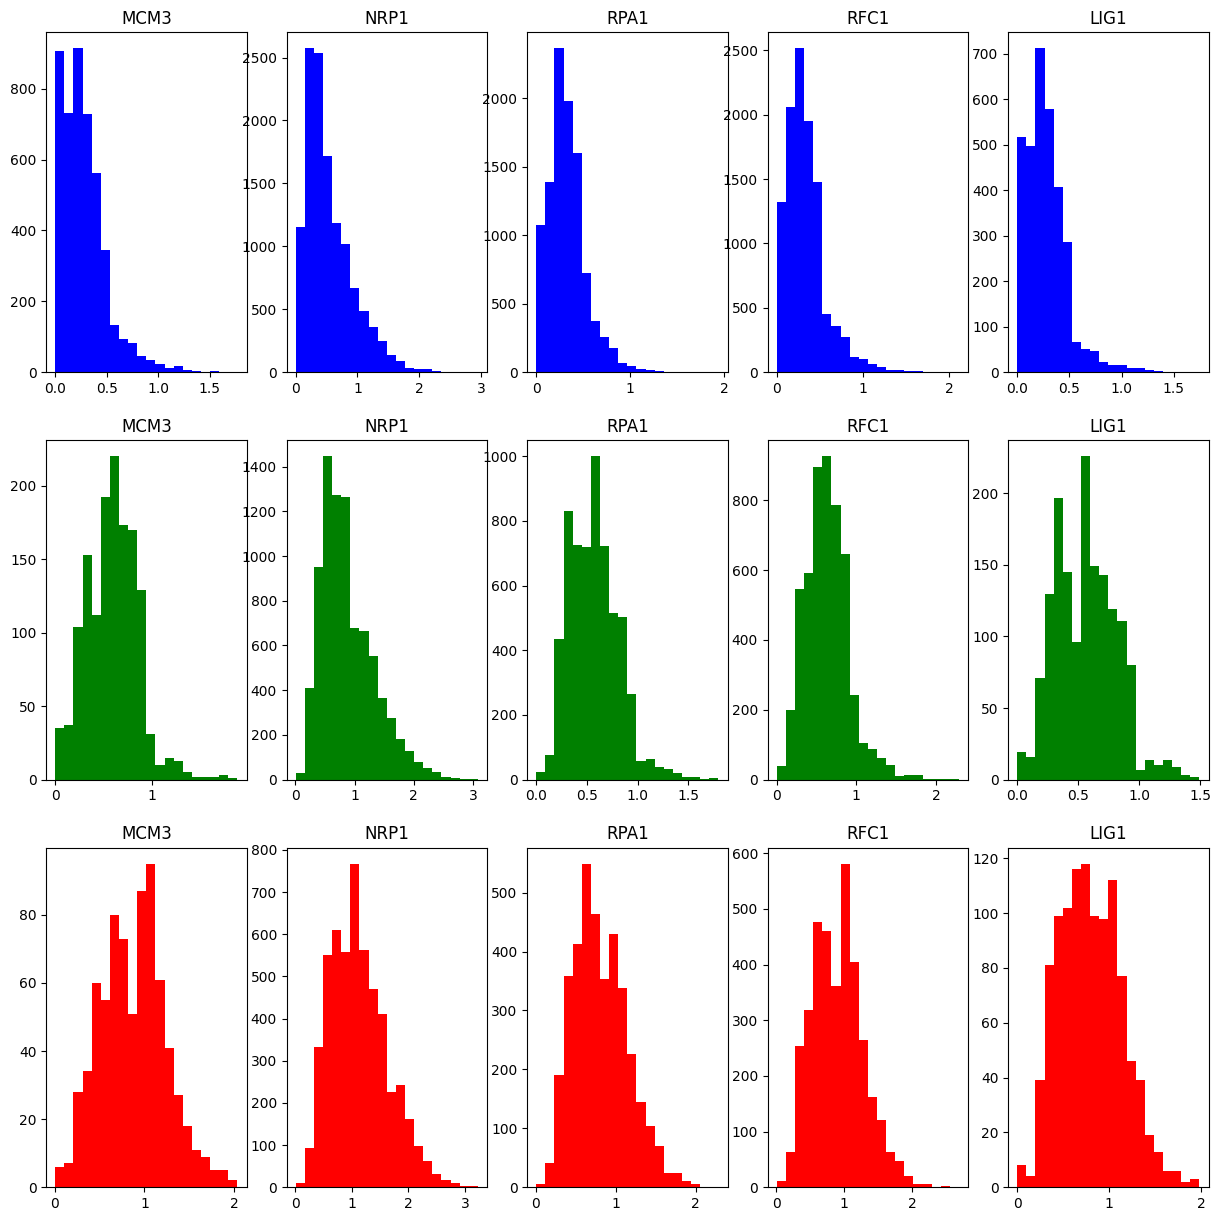

In [168]:
plt.figure(figsize=(15, 15))

for i, quant in enumerate(quant_kd):
    quant_ = 0 if i == 0 else quant_kd[i-1]
    # We use multiply because sparse matrices
    adata_quant = adata_duplication[(adata_kd.X < quant).multiply(adata_kd.X > quant_), : ]

    for j, gene in enumerate(duplication_genes):
        print(gene)
        adata_gene = adata_quant[:, adata_quant.var.feature_name == gene]
        plt.subplot(3, 5, i*len(duplication_genes) + j+1) # 3 rows, 5 columns ith plot
        plt.hist(adata_gene.X.data, bins=20, color=levels_quant[i])
        plt.title(gene)

plt.show()

### KMD6A

MCM3
NRP1
RPA1
RFC1
LIG1
MCM3
NRP1
RPA1
RFC1
LIG1
MCM3
NRP1
RPA1
RFC1
LIG1


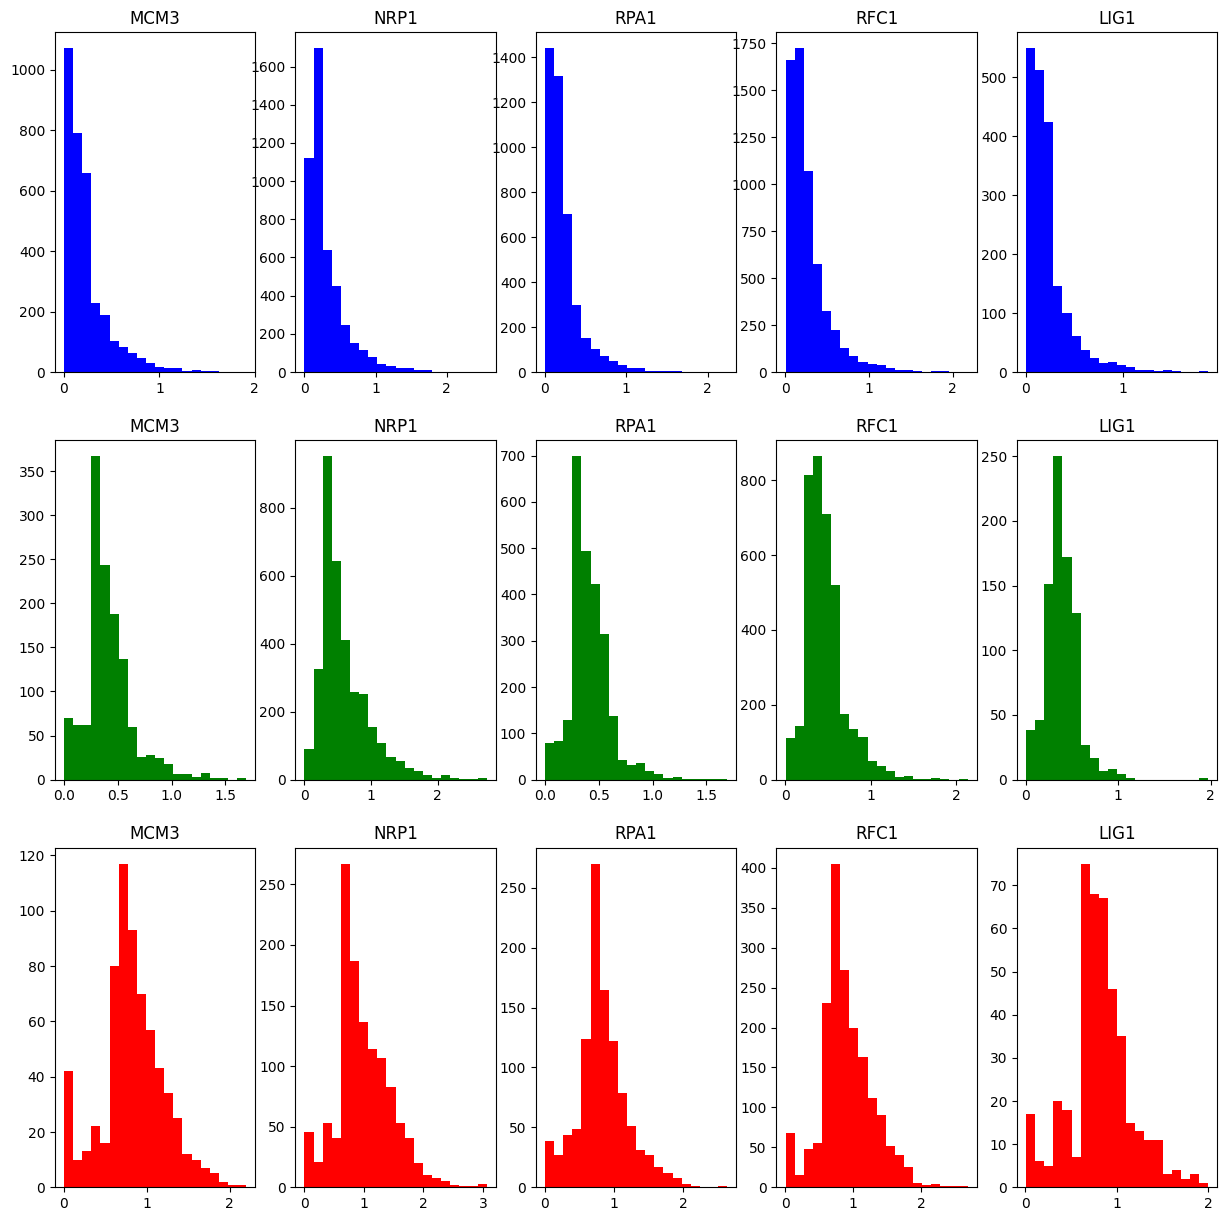

In [169]:
plt.figure(figsize=(15, 15))

for i, quant in enumerate(quant_km):
    quant_ = 0 if i == 0 else quant_km[i-1]
    # We use multiply because sparse matrices
    adata_quant = adata_duplication[(adata_km.X < quant).multiply(adata_km.X > quant_), : ]

    for j, gene in enumerate(duplication_genes):
        print(gene)
        adata_gene = adata_quant[:, adata_quant.var.feature_name == gene]
        plt.subplot(3, 5, i*len(duplication_genes) + j+1) # 3 rows, 5 columns ith plot
        plt.hist(adata_gene.X.data, bins=20, color=levels_quant[i])
        plt.title(gene)

plt.show()

## DE normal and tumor

This method requires log transformed values

In [ ]:
sc.pp.log1p(adata)

In [142]:
adata.layers['logcounts'] = adata.X

In [ ]:
adata_normal = adata[adata.obs.origin == 'normal_adjacent']
adata_tumor = adata[adata.obs.final_pred == 'Tumor']

Parallel processing of marker genes from mutliple subsets

In [215]:
# We use Pool instead of ThreadPool for it creates a separate process for each
# and is not limited by the GIL, a drawback is that the shared objects dont get modified in global scope
# from multiprocessing.pool import ThreadPool
from multiprocessing import Pool
num_processes = 4

def ranker_parallel(num):
    if num == 0:
        # sc.tl.rank_genes_groups(adata, 'utx_level', groups=['high'], method='wilcoxon', use_raw=False, key_added='all_high')
        pass
    if num == 1:
        sc.tl.rank_genes_groups(adata_normal, 'utx_level', groups=['high'], method='wilcoxon', use_raw=False, key_added='normal_high')
        return adata_normal.uns['normal_high']
    if num == 2:
        sc.tl.rank_genes_groups(adata_normal, 'utx_level', groups=['low'], method='wilcoxon', use_raw=False, key_added='normal_low')
        return adata_normal.uns['normal_low']
    if num == 3:
        sc.tl.rank_genes_groups(adata_tumor, 'utx_level', groups=['low'], method='wilcoxon', use_raw=False, key_added='tumor_low')
        return adata_tumor.uns['tumor_low']


# The context manager will automatically join the processes
unses = []
with Pool(num_processes) as pool:
    results = pool.map(ranker_parallel, range(4))

    for i, result in enumerate(results):
        unses.append(result)
        print(f'Finished or errored: {i}')
        


/usr/local/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/usr/local/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/usr/local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.11/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.11/site-packages/anndat

Finished or errored: 0
Finished or errored: 1
Finished or errored: 2
Finished or errored: 3


In [227]:
# adata_normal.uns['normal_high'] = unses[1]
adata_normal.uns['normal_low'] = unses[2]
adata_tumor.uns['tumor_low'] = unses[3]

The exploration of the genes that are DE when KMT2D and KDM6A are high or low

In [317]:
import utils.functions as ut
import importlib

importlib.reload(ut)

<module 'utils.functions' from '/root/host_home/luca/utils/functions.py'>

### Overexpressed

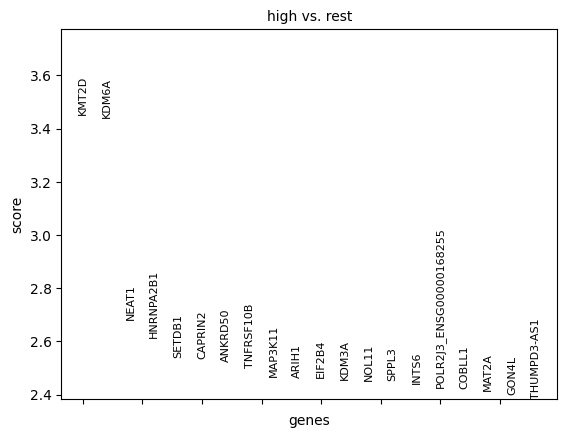

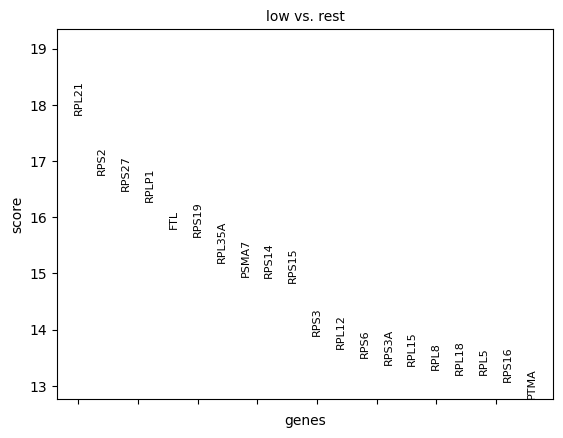

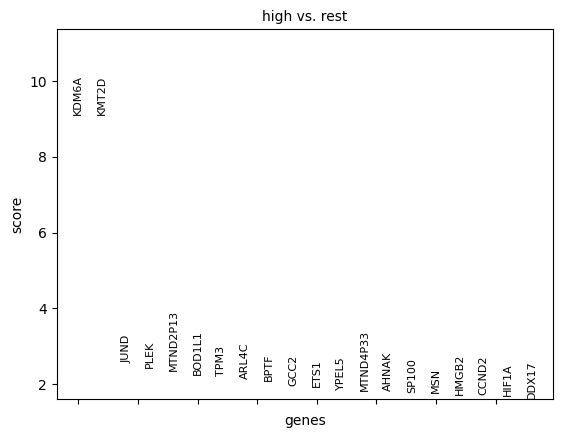

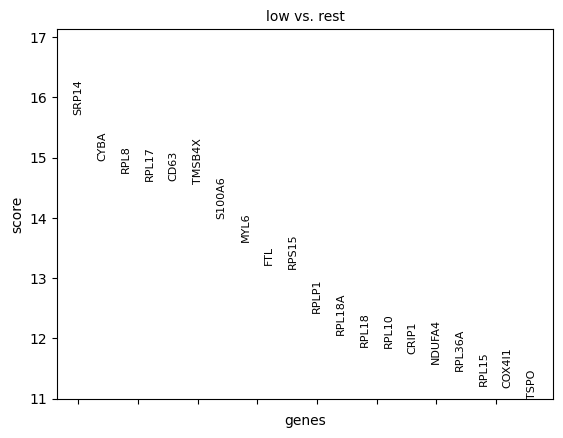

<Axes: title={'center': 'low vs. rest'}, xlabel='genes', ylabel='score'>

In [304]:
ut.rank_genes_group(adata_tumor, gene_symbols='feature_name', key='tumor_high', group_name='high', show=True)
ut.rank_genes_group(adata_tumor, gene_symbols='feature_name', key='tumor_low', group_name='low', show=True)

ut.rank_genes_group(adata_normal, gene_symbols='feature_name', key='normal_high', group_name='high', show=True)
ut.rank_genes_group(adata_normal, gene_symbols='feature_name', key='normal_low', group_name='low', show=True)

### Underexpressed

<Axes: title={'center': 'high vs. rest'}, xlabel='genes', ylabel='score'>

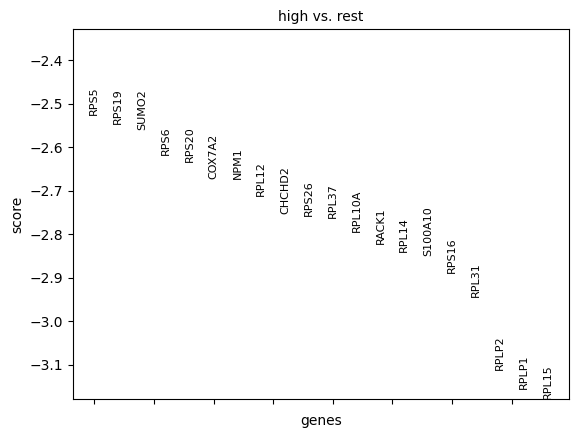

In [295]:
low_genes = adata_tumor.uns['tumor_high']['names']['high'][-20:]

ut.rank_genes_group(adata_tumor, group_name='high', 
                 gene_symbols='feature_name', key='tumor_high', gene_names=low_genes)

<Axes: title={'center': 'low vs. rest'}, xlabel='genes', ylabel='score'>

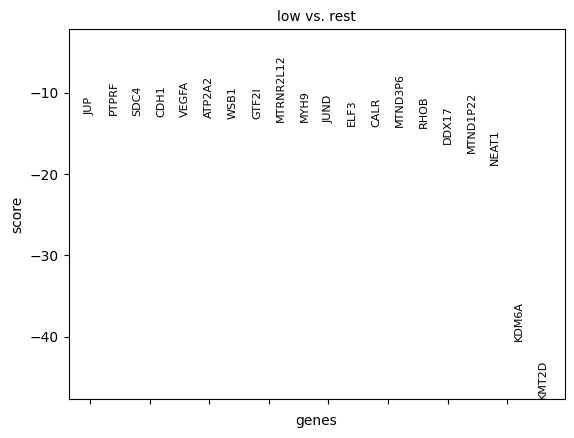

In [296]:
low_genes = adata_tumor.uns['tumor_low']['names']['low'][-20:]

ut.rank_genes_group(adata_tumor, group_name='low', 
                 gene_symbols='feature_name', key='tumor_low', gene_names=low_genes)

<Axes: title={'center': 'high vs. rest'}, xlabel='genes', ylabel='score'>

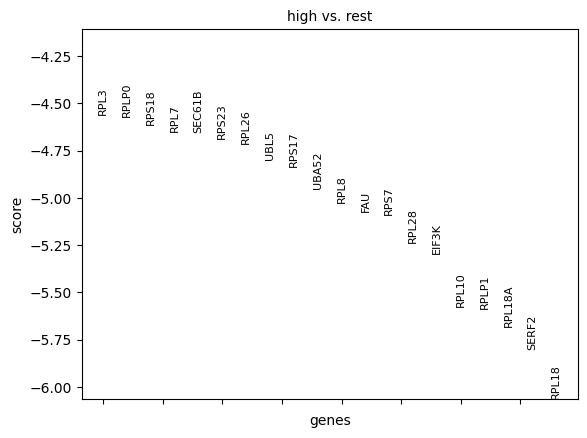

In [297]:
low_genes = adata_normal.uns['normal_high']['names']['high'][-20:]

ut.rank_genes_group(adata_normal, group_name='high', 
                 gene_symbols='feature_name', key='normal_high', gene_names=low_genes)

<Axes: title={'center': 'low vs. rest'}, xlabel='genes', ylabel='score'>

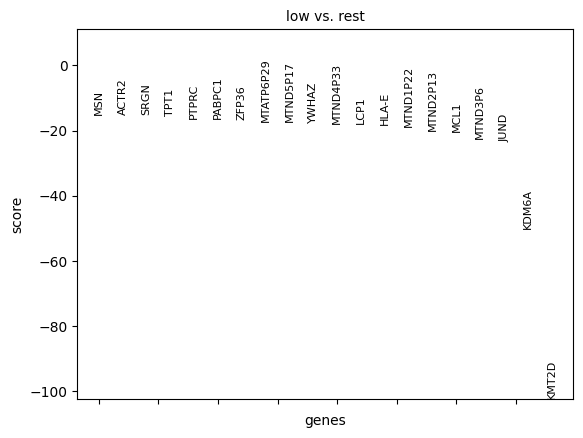

In [299]:
low_genes = adata_normal.uns['normal_low']['names']['low'][-20:]

ut.rank_genes_group(adata_normal, group_name='low', 
                 gene_symbols='feature_name', key='normal_low', gene_names=low_genes)

### Stacked violin plots for genes of different functions

In [305]:
genes = dna_duplication_genes

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


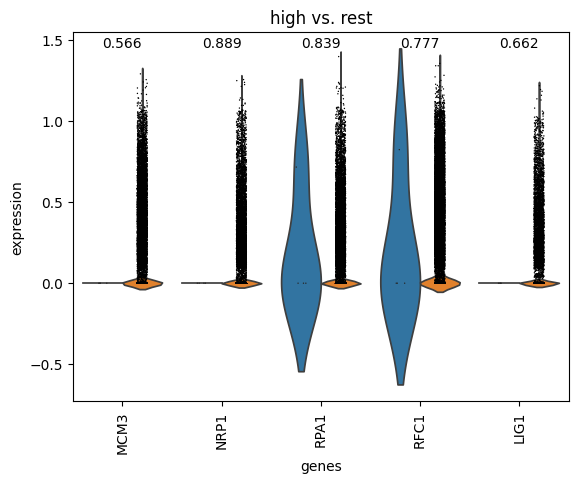

In [318]:
cluster = 'high'
ut.violin_genes_pval(adata_tumor, cluster, genes, key='tumor_high')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


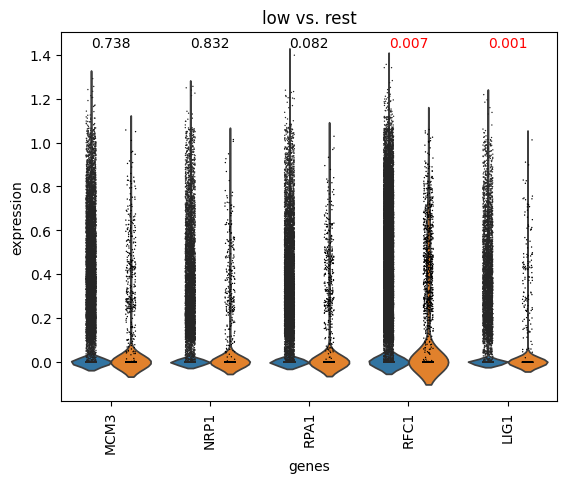

In [319]:
cluster = 'low'
ut.violin_genes_pval(adata_tumor, cluster, genes, key='tumor_low')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


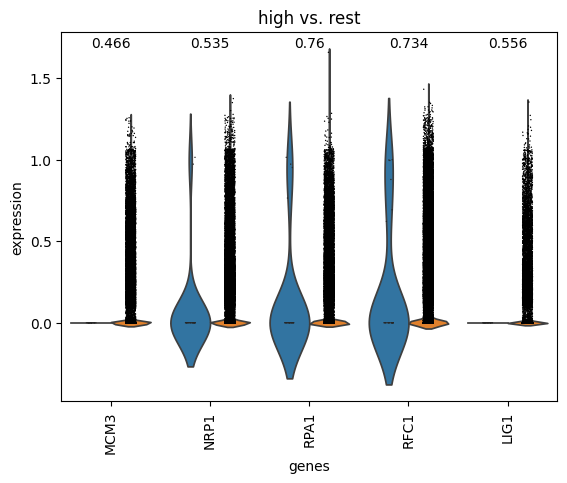

In [322]:
cluster = 'high'
ut.violin_genes_pval(adata_normal, cluster, genes, key='normal_high')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


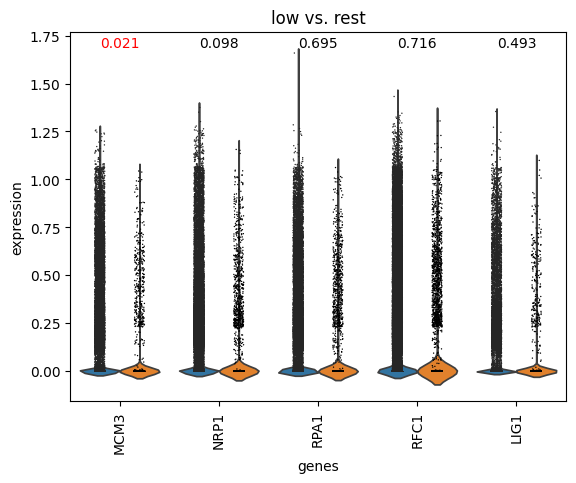

In [323]:
cluster = 'low'
ut.violin_genes_pval(adata_normal, cluster, genes, key='normal_low')

In [324]:
genes = apoptosis_genes

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


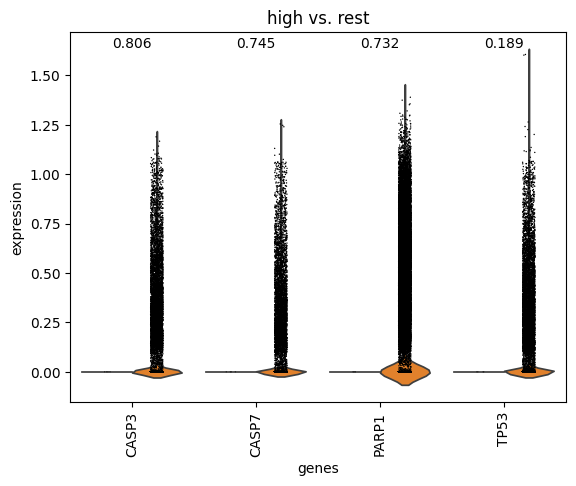

In [325]:
cluster = 'high'
ut.violin_genes_pval(adata_tumor, cluster, genes, key='tumor_high')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


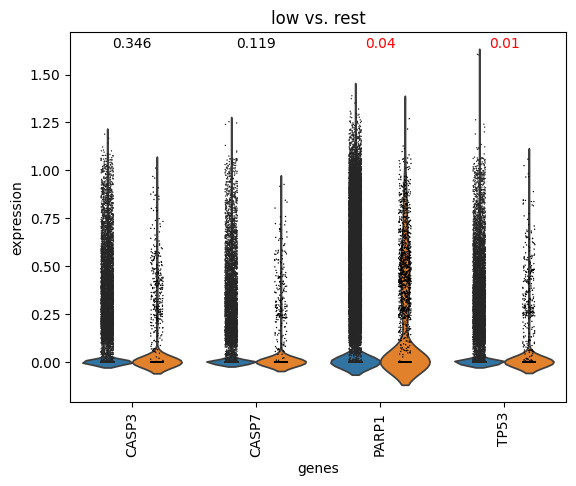

In [326]:
cluster = 'low'
ut.violin_genes_pval(adata_tumor, cluster, genes, key='tumor_low')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


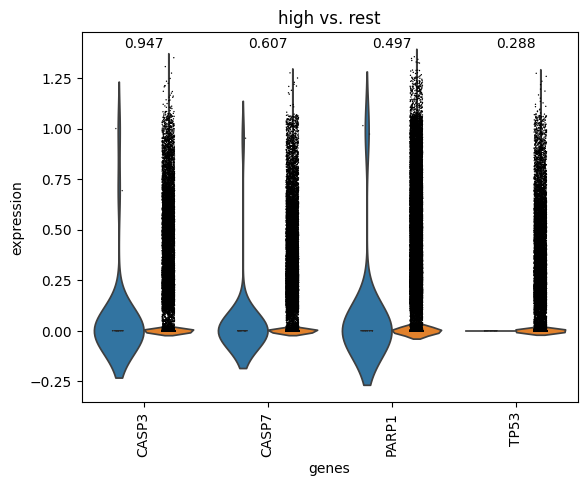

In [327]:
cluster = 'high'
ut.violin_genes_pval(adata_normal, cluster, genes, key='normal_high')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


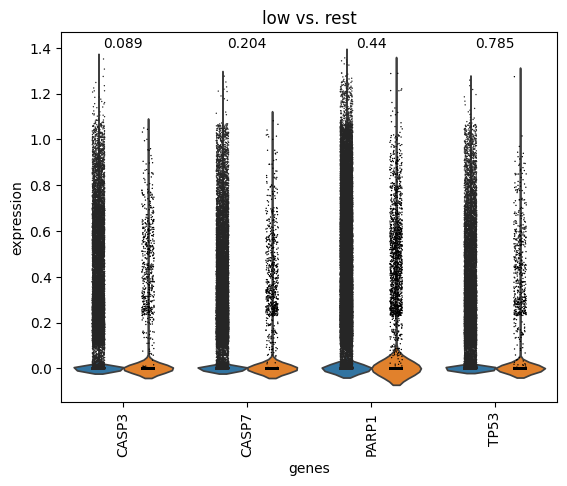

In [328]:
cluster = 'low'
ut.violin_genes_pval(adata_normal, cluster, genes, key='normal_low')

In [341]:
genes = bcl_genes

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


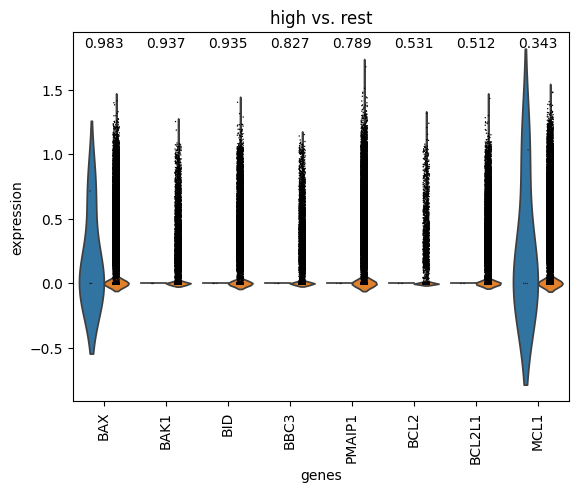

In [342]:
cluster = 'high'
ut.violin_genes_pval(adata_tumor, cluster, genes, key='tumor_high')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


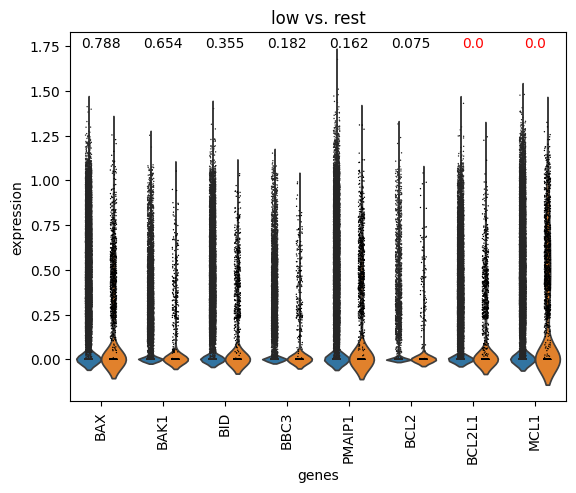

In [343]:
cluster = 'low'
ut.violin_genes_pval(adata_tumor, cluster, genes, key='tumor_low')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


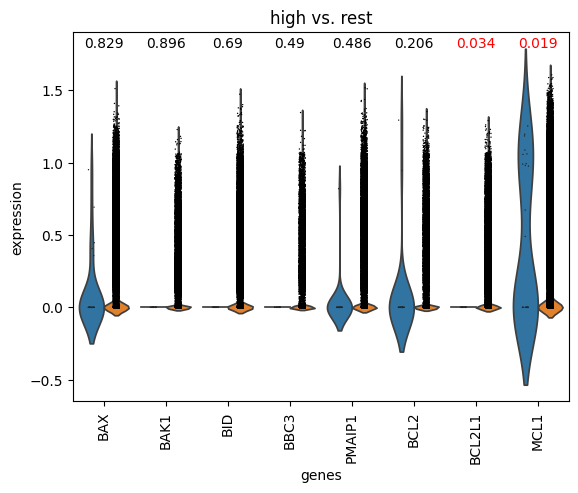

In [344]:
cluster = 'high'
ut.violin_genes_pval(adata_normal, cluster, genes, key='normal_high')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


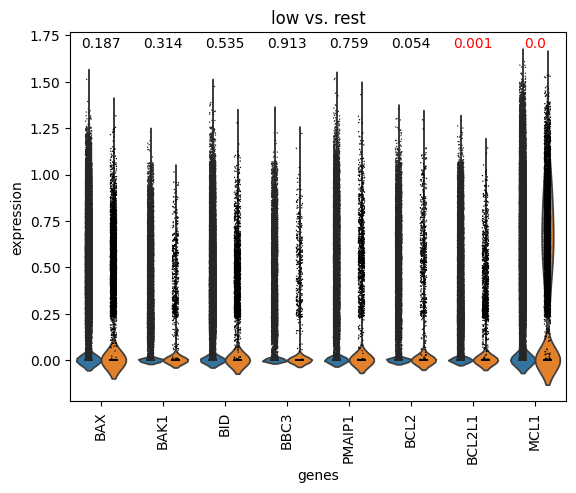

In [345]:
cluster = 'low'
ut.violin_genes_pval(adata_normal, cluster, genes, key='normal_low')

In [329]:
genes = pyroptosis_genes

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


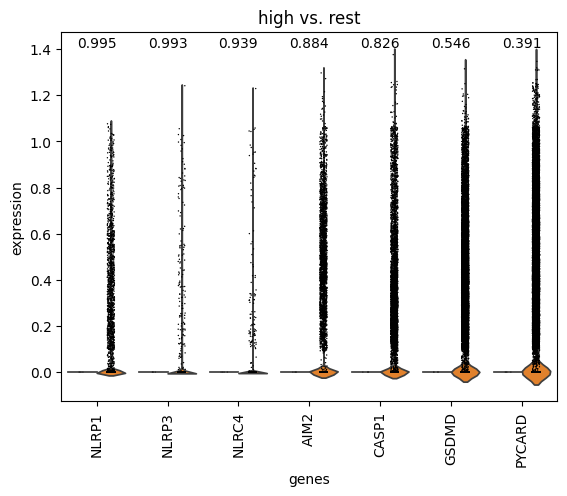

In [330]:
cluster = 'high'
ut.violin_genes_pval(adata_tumor, cluster, genes, key='tumor_high')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


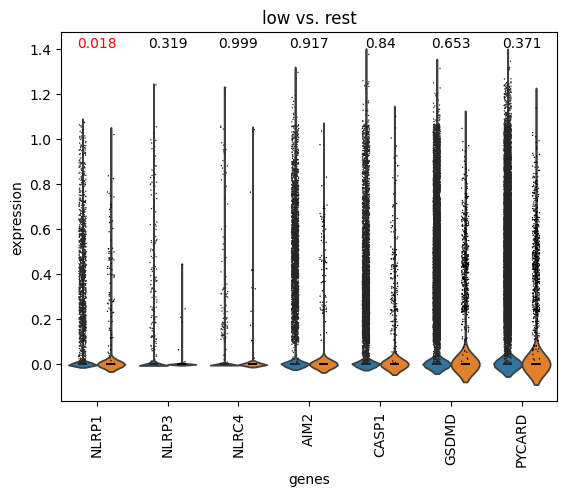

In [331]:
cluster = 'low'
ut.violin_genes_pval(adata_tumor, cluster, genes, key='tumor_low')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


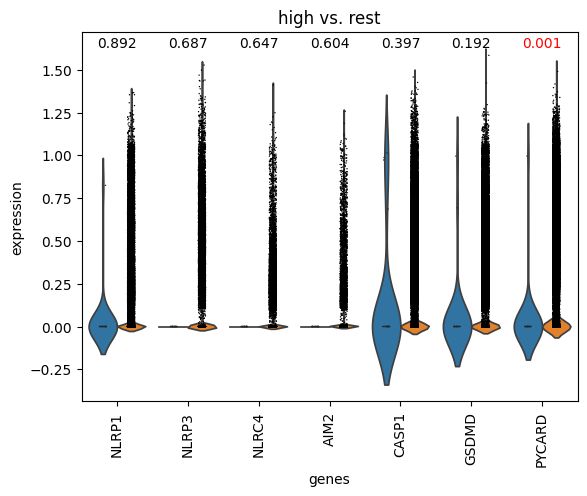

In [332]:
cluster = 'high'
ut.violin_genes_pval(adata_normal, cluster, genes, key='normal_high')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


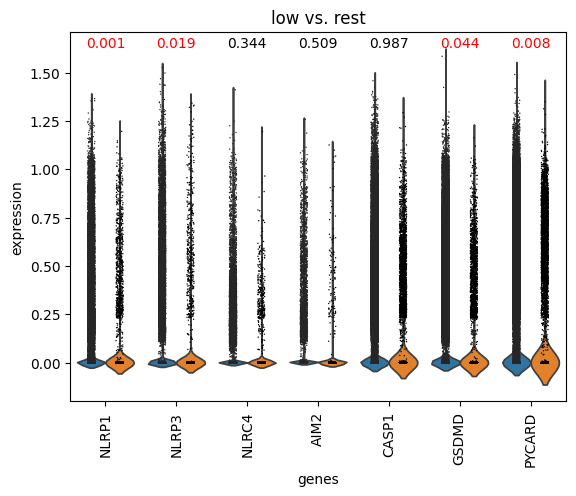

In [333]:
cluster = 'low'
ut.violin_genes_pval(adata_normal, cluster, genes, key='normal_low')

In [339]:
genes = ferroptosis_genes

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


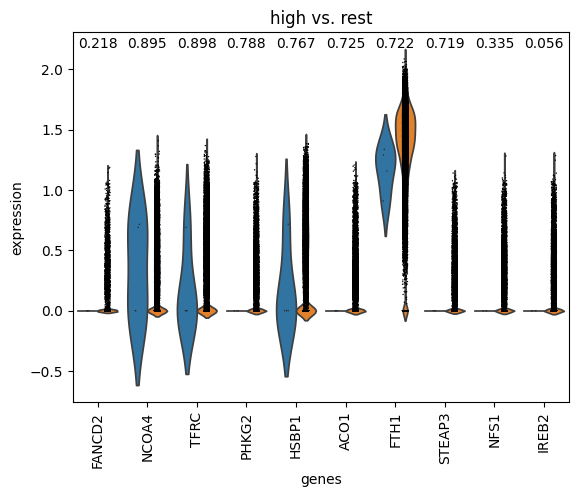

In [340]:
cluster = 'high'
ut.violin_genes_pval(adata_tumor, cluster, genes, key='tumor_high')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


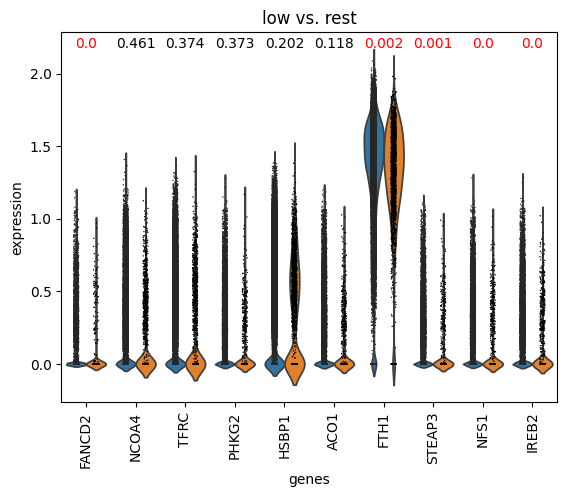

In [336]:
cluster = 'low'
ut.violin_genes_pval(adata_tumor, cluster, genes, key='tumor_low')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


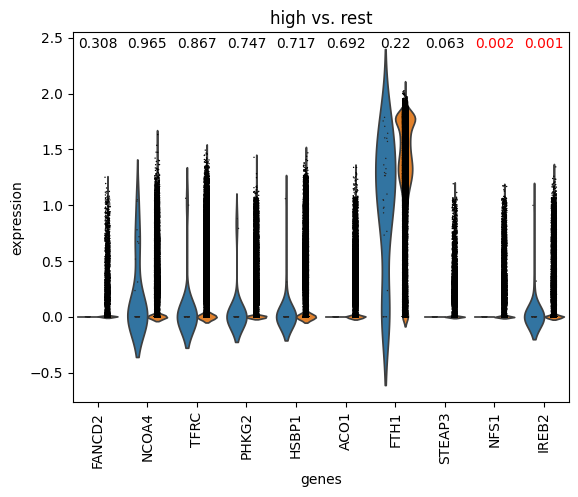

In [337]:
cluster = 'high'
ut.violin_genes_pval(adata_normal, cluster, genes, key='normal_high')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1170: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  _ax = sns.violinplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1183: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  _ax = sns.stripplot(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1199: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation='vertical')


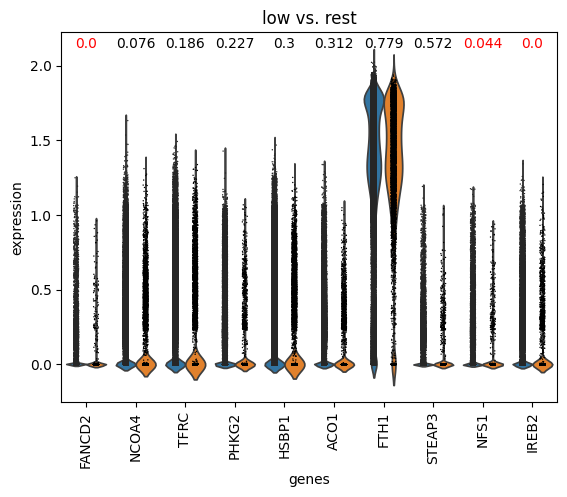

In [338]:
cluster = 'low'
ut.violin_genes_pval(adata_normal, cluster, genes, key='normal_low')

## GSEA

In [387]:
gen_list

array([9.118483 , 9.1104555, 2.5544784, 2.4251215, 2.3382828, 2.2469292,
       2.2115152, 2.1328483, 2.0876942, 1.9625071, 1.9393492, 1.851959 ,
       1.823645 , 1.8103517, 1.7795894, 1.7746153, 1.714955 , 1.7072343,
       1.6824529, 1.6128136, 1.6081518, 1.6079803, 1.6041638, 1.592741 ,
       1.529148 , 1.5185297, 1.500297 , 1.4917002, 1.4874713, 1.4838897,
       1.4807084, 1.4667494, 1.4628003, 1.4393156, 1.4309108, 1.4004241,
       1.3816808, 1.378277 , 1.3554946, 1.3467448, 1.3335394, 1.3248304,
       1.3228905, 1.3176835, 1.3036041, 1.3008147, 1.2973332, 1.2871336,
       1.26983  , 1.262195 ], dtype=float32)

In [402]:
gen_list = adata_tumor.uns['tumor_low']['names']['low'][50:]

In [403]:
enrichment = sc.queries.enrich(list(gen_list), org="hsapiens")
enri = enrichment.loc[:,['native','name', 'p_value']]
enri.index.name = 'index'
enri.loc[:20,:]

native                                               name  \
index                                                                   
0       GO:0048522            positive regulation of cellular process   
1      TF:M09894_1  Factor: E2F-4; motif: SNGGGCGGGAANN; match cla...   
2      TF:M12599_1  Factor: E2F4; motif: YCCCGCCNCNNSSNNSNN; match...   
3        TF:M02089                      Factor: E2F-3; motif: GGCGGGN   
4        TF:M00803                         Factor: E2F; motif: GGCGSG   
5      TF:M00803_1         Factor: E2F; motif: GGCGSG; match class: 1   
6      TF:M08526_1  Factor: E2F-3:HES-7; motif: NNNSGCGCSNNNNNCRCG...   
7      TF:M10438_1      Factor: ZF5; motif: GGSGCGCGS; match class: 1   
8      TF:M11531_1  Factor: E2F-2; motif: GCGCGCGCGYW; match class: 1   
9        TF:M10438                      Factor: ZF5; motif: GGSGCGCGS   
10       TF:M11531                  Factor: E2F-2; motif: GCGCGCGCGYW   
11     TF:M11529_1  Factor: E2F-2; motif: GCGCGCGCNCS; match class: 1   
12      GO:1901564          organonitrogen compound metabolic process   
13     TF:M00716_1       Factor: ZF5; motif: GSGCGCGR; match class: 1   
14       TF:M00716                       Factor: ZF5; motif: GSGCGCGR   
15      GO:0065007                              biological regulation   
16      GO:0005515                                    protein binding   
17      GO:0048518          positive regulation of biological process   
18      GO:0032502                              developmental process   
19      GO:0005654                                        nucleoplasm   
20      GO:0005829                                            cytosol   

             p_value  
index                 
0      4.940656e-324  
1      4.940656e-324  
2      4.940656e-324  
3      4.940656e-324  
4      4.940656e-324  
5      4.940656e-324  
6      4.940656e-324  
7      4.940656e-324  
8      4.940656e-324  
9      4.940656e-324  
10     4.940656e-324  
11     4.940656e-324  
12     4.940656e-324  
13     4.940656e-324  
14     4.940656e-324  
15     4.940656e-324  
16     4.940656e-324  
17     4.940656e-324  
18     4.940656e-324  
19     4.940656e-324  
20     4.940656e-324